# Data Preprocessing

## Import Packages and datasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import os
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)
import warnings
warnings.simplefilter('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import pickle
#import category_encoders as ce

from datetime import date
import datetime
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
listing = pd.read_csv('roofstock_marketplace_listing_historical_full.csv')
transaction = pd.read_csv('roofstock_marketplace_transactions_full.csv')
offer = pd.read_csv('roofstock_marketplace_offers_full.csv')
buyer = pd.read_csv('roofstock_marketplace_buyers_full.csv')
newdf = pd.read_csv('latter_final.csv')
df = pd.read_csv('latter_final.csv')

In [7]:
len(offer)

31852

## Delete Variables
* Text/ Unstructured feature: 
such as PROPERTYHIGHLIGHTS
* Features with over 50% missing values: 
such as  RESERVEDEPOSIT, all NAs
* Features explaining the same things: 
such as LISTING_SOURCE_ID and LISTING_SOURCE, only maintain the latter one.
* Useless Features: such as VIRTUALTOURURL
* Unique Identifier: such as ACCOUNT_ID

In [8]:
droplist=['REC_START_TS','REC_END_TS','CERTIFICATION_ID','ACCOUNT_ID','LISTING_STATUS_TYPE',
'COUNTRY','OPENHOUSE_PUBLISH_TS','OPENHOUSE_CONSIDER_OFFERS_TS','OPENHOUSE_END_TS',
'LISTING_SOURCE_ID', 'PROPERTYHIGHLIGHTS','PROPERTYMARKETINGPOINTS',
'VIRTUALTOURURL','MLSMODIFICATIONTIMESTAMP','SALE_PRICE',
'MONTHLYMANAGEMENTFEES','TURNOVER_FEE','AVMBPOADJVALUE',
'COMPUTEDRESERVEDEPOSIT','RESERVEDEPOSIT','MONTHLYASSETMANAGEMENTFEE',
'OCCUPANCYLASTUPDATEDDATE','LEASESTARTDATE','LEASEENDDATE','NOTES',
'ADDRESS1','ADDRESS2','CITY','DISTRICT','COUNTY','ZIP','ZIPPLUS4','EVENT_UTC','CREATED_TS',
'LISTING_ID','ATTICCONDITIONID','BASEMENTCONDITIONID','BATHROOMSCONDITIONID','BEDROOMSCONDITIONID',
'ELECTRICALCONDITIONID','EST_VALUATION','EXTERIORCONDITIONID','FEATUREDREASON','GARAGECONDITIONID','HVACCONDITIONID',
'INSPECTION_CONTINGENCY_REASON_ID','SOLD_DATE','STORIES','STRUCTURALCONDITIONID','UNITS',
'YEARLYCAPITALEXPENDITURESCOST','YEARLYREPAIRSMAINTENANCECOST','LISTING_INITIAL_PUBLISH_TS',
'LISTING_INTIAL_PUBLISH_DATE','LISTING_PUBLISH_DATE','LISTING_PUBLISH_TS','PROPERTY_ID','SALES_PENDING_DATE',
'PREVIOUS_ESCROW_CLOSING_DATE','EST_RENT_LOW','EST_RENT_HIGH','COMPUTEDRESERVEDEPOSITPERCENTAGE', 'Unnamed: 0',
'COMPUTEDDOWNPAYMENT','MARKETEDRENT','LATEPAYMENTMONTHS','PETFEEAMOUNT','PETSDEPOSITAMOUNT','RSRENTESTIMATE','AVMBPOVALUE']
newdf = newdf.drop(droplist,axis=1)
#记得删除state

In [9]:
droplist = ['GMAPPOVLATITUDE','GMAPPOVLONGITUDE','EST_VALUATION_HIGH','EST_VALUATION_LOW',
           'LATITUDE','LONGITUDE']

newdf = newdf.drop(droplist,axis=1)

In [10]:
newdf.head()

,LISTING_STATUS,LISTING_STATUS_IS_ACTIVE,STATE,MARKET_ID,CBSA_CODE,LOTSIZE,SQUAREFEET,YEARBUILT,BEDROOMS,BATHROOMS,ISPOOL,ISHOA,TITLESTATUS,GMAPHASSTREETVIEW,GMAPPOVHEADING,GMAPPOVPITCH,FLOODRISKSCORE,SCHOOLELEMENTARYSCORE,SCHOOLMIDDLESCORE,SCHOOLHIGHSCORE,VISIBILITY_ID,PRICEVISIBILITY,HASAUDIO,CERTIFICATIONLEVEL,ALLOWEDFUNDINGTYPES,ISALLOWOFFER,ISALLOWPREVIEW,ISFEATURED,ISRENTGUARANTEED,ISSECURITIZED,INSPECTION_CONTINGENCY_REQUIRED,ALLOWABLE_SALE_TYPES,LISTING_SOURCE,INSPECTION_TYPE_ID,ISEXCLUSIVE,KITCHENCONDITIONID,LANDSCAPINGCONDITIONID,PLUMBINGCONDITIONID,ROOFCONDITIONID,ISELIGIBLEFORADS,NEIGHBORHOODSCORE,MLSNAME,MARKETPLACESORTORDER,LIST_PRICE,MONTHLY_RENT,MARKET_RENT,MONTHLYHOA,YEARLYPROPERTYTAXES,YEARLYINSURANCECOST,PREVIOUSYEARLYPROPERTYTAXES,EST_REPAIR_COST,ASSUMED_DOWNPAYMENT_TYPE,COMPUTED_GROSS_YIELD,COMPUTED_CAP_RATE,COMPUTEDTOTALEXPENSES,COMPUTEDTOTALEXPENSESPERCENTAGE,COMPUTEDCASHFLOW,COMPUTEDAPPRECIATION,COMPUTEDLEVEREDIRR,COMPUTEDLEVEREDCASHONCASH,COMPUTEDLEVEREDNETYIELD,COMPUTEDLEVEREDANNUALCASHFLOW,COMPUTEDTOTALRETURN,COMPUTEDTOTALOPERATINGEXPENSEPERCENT,COMPUTEDLEVEREDINITIALOUTLAY,COMPUTEDLOANPAYMENTS,COMPUTEDEXPENSESANDRESERVES,COMPUTEDEXPECTEDRENT,COMPUTEDDOWNPAYMENTPERCENTAGE,COMPUTEDPROPERTYTAXES,OCCUPANCY,LEASINGSTATUS,PAYMENTSTATUS,LEASEMONTHLYRENT,SECURITYDEPOSITAMOUNT,HASPET,ISPETSDEPOSIT,ISLEASECONCESSIONS,ISSECTION8,ISRENTERSINSURANCEREQUIRED,ISTENANTBACKGROUNDCHECKED,ISTENANTINCOMEABOVE3X,ISTENANTMAYTERMINATEEARLY,ISTENANTPURCHASEOPTION,OWNERELECTRIC,OWNERGAS,OWNERWATER,OWNERGARBAGE,OWNERPOOL,OWNERLANDSCAPING,OWNERPESTCONTROL,OWNERREFRIGERATOR,OWNERDISHWASHER,OWNERWASHER,OWNERDRYER,OWNERMICROWAVE,OWNERSTOVE,OFFER_PRICE,diff_days
0,For Sale,True,DC,9052.0,47900.0,787439.0,55000.0,1792.0,16.0,35.0,False,True,1.0,True,0.0,4.0,X,6.0,NaN,7.0,10,0,False,100.0,21.0,True,False,True,False,False,False,1,Direct,NaN,True,NaN,NaN,NaN,NaN,False,5.0,NaN,0,400000000.0,2100000.0,2040000.0,60000.0,400000.0,1688000.4,NaN,NaN,0.0,0.063,0.0446,6071400.4,0.2068,17868599.6,0.0459,0.12,-0.01,-0.0046,-1868304.51,94555302.21,0.2536,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,2100000.0,250000.0,True,NaN,True,True,True,False,True,True,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-9.0,1015
1,For Sale,True,DC,9052.0,47900.0,787439.0,55000.0,1792.0,16.0,35.0,False,True,1.0,True,0.0,4.0,X,6.0,NaN,7.0,10,0,False,100.0,21.0,True,False,True,False,False,False,1,Direct,NaN,True,NaN,NaN,NaN,NaN,False,5.0,NaN,0,400000000.0,2100000.0,2040000.0,60000.0,400000.0,1688000.4,NaN,NaN,0.0,0.063,0.0446,6071400.4,0.2068,17868599.6,0.0459,0.11,-0.02,-0.0074,-2968333.67,87101404.07,0.2536,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,2100000.0,250000.0,True,NaN,True,True,True,False,True,True,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-9.0,1015
2,For Sale,True,DC,9052.0,47900.0,787439.0,55000.0,1792.0,16.0,35.0,False,True,1.0,True,0.0,4.0,X,7.0,7.0,8.0,10,0,False,100.0,21.0,True,False,True,False,False,False,1,Direct,NaN,True,NaN,NaN,NaN,NaN,False,5.0,NaN,0,400000000.0,2100000.0,2040000.0,60000.0,400000.0,1688000.4,NaN,NaN,0.0,0.063,0.0446,6071400.4,0.2068,17868599.6,0.0459,0.11,-0.02,-0.0074,-2968333.67,87101404.07,0.2536,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,2100000.0,250000.0,True,NaN,True,True,True,False,True,True,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-9.0,1015
3,For Sale,True,DC,9052.0,47900.0,787439.0,55000.0,1792.0,16.0,35.0,False,True,1.0,True,0.0,4.0,X,7.0,7.0,8.0,10,0,False,100.0,21.0,True,False,True,False,False,False,1,Direct,NaN,True,NaN,NaN,NaN,NaN,False,5.0,NaN,0,400000000.0,2100000.0,2040000.0,60000.0,400000.0,1688000.4,NaN,NaN,0.0,0.063,0.0446,NaN,NaN,17868599.6,0.0459,0.11,-0.02,-0.0074,-2968333.67,87101404.07,NaN,110000000.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,2100000.0,250000.0,True,NaN,True,True,True,False,True,True,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-9.0,1015
4,For Sale,True,DC,9052.0,47900.0,787439.0,55000.0,1792.0,16.0,35.0,False,True,1.0,True,0.0,4.0,X,7.0,7.0,8.0,0,0,False,100.

## Fill Missing Value
* Categorical feature: 
create a new level
* Numerical feature: 
group by STATE, 
filtered with price range of +- 20000,
then fill NA with the group’s median


In [13]:
#### FILL MISSING VALUE
newdf.MARKET_ID = newdf.MARKET_ID.fillna(-9999.)
newdf.CBSA_CODE = newdf.CBSA_CODE.fillna(-99999.)
newdf.LOTSIZE = newdf.LOTSIZE.fillna(0.)

newdf['SQUAREFEET']=newdf['SQUAREFEET'].fillna(-9999)
for i in tqdm(list(newdf[newdf['SQUAREFEET']==-9999].index)):
        c_state=newdf['STATE'][i]
        c_price=newdf['LIST_PRICE'][i]
        c_df=newdf[newdf['STATE']==c_state]
        cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
        cc_df=cc_df[cc_df['SQUAREFEET']!=-9999]
        fill_square=np.median(cc_df['SQUAREFEET'])
        newdf.set_value(i,'SQUAREFEET',fill_square)
newdf['SQUAREFEET']=df['SQUAREFEET'].fillna(np.median(df['SQUAREFEET']))
    
newdf['BEDROOMS']=newdf['BEDROOMS'].fillna(-999)
for i in tqdm(list(newdf[newdf['BEDROOMS']== -999].index)):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    cc_df=cc_df[cc_df['BEDROOMS']!=-999]
    fill_square=np.median(cc_df['BEDROOMS'])
    newdf.set_value(i,'BEDROOMS',fill_square)
newdf['BEDROOMS']=df['BEDROOMS'].fillna(np.median(df['BEDROOMS']))
    

newdf['BATHROOMS']=newdf['BATHROOMS'].fillna(-999)
for i in list(newdf[newdf['BATHROOMS']==-999].index):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    cc_df=cc_df[cc_df['BATHROOMS']!=-999]
    fill_square=np.median(cc_df['BATHROOMS'])
    newdf.set_value(i,'BATHROOMS',fill_square)
newdf['BATHROOMS']=df['BATHROOMS'].fillna(np.median(df['BATHROOMS']))
    
newdf.ISPOOL = newdf.ISPOOL.fillna(False)
newdf.ISHOA = newdf.ISHOA.fillna(False)
newdf.GMAPHASSTREETVIEW = newdf.GMAPHASSTREETVIEW.fillna(False)
newdf.GMAPPOVHEADING = newdf.GMAPPOVHEADING.fillna(-9999.)
newdf.GMAPPOVPITCH = newdf.GMAPPOVPITCH.fillna(-9999.)
newdf.SCHOOLELEMENTARYSCORE = newdf.SCHOOLELEMENTARYSCORE.fillna(0.)
newdf.SCHOOLMIDDLESCORE = newdf.SCHOOLMIDDLESCORE.fillna(0.)
newdf.SCHOOLHIGHSCORE = newdf.SCHOOLHIGHSCORE.fillna(0.)
newdf.CERTIFICATIONLEVEL = newdf.CERTIFICATIONLEVEL.fillna(-9999)
newdf.ALLOWEDFUNDINGTYPES = newdf.ALLOWEDFUNDINGTYPES.fillna(-9999)
newdf.INSPECTION_TYPE_ID = newdf.INSPECTION_TYPE_ID.fillna(-9999)
newdf.KITCHENCONDITIONID = newdf.KITCHENCONDITIONID.fillna(-9999)
newdf.LANDSCAPINGCONDITIONID = newdf.LANDSCAPINGCONDITIONID.fillna(-9999)
newdf.PLUMBINGCONDITIONID = newdf.PLUMBINGCONDITIONID.fillna(-9999)
newdf.ROOFCONDITIONID = newdf.ROOFCONDITIONID.fillna(-9999)
newdf.NEIGHBORHOODSCORE = newdf.NEIGHBORHOODSCORE.fillna(0.)
newdf.MLSNAME = newdf.MLSNAME.fillna('Not from mls')
newdf.MONTHLYHOA = newdf.MONTHLYHOA.fillna(-9999)

newdf['MONTHLY_RENT']=newdf['MONTHLY_RENT'].fillna(-9999)
for i in list(newdf[newdf['MONTHLY_RENT']==-9999].index):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    cc_df=cc_df[cc_df['MONTHLY_RENT']!=-9999]
    fill_square=np.median(cc_df['MONTHLY_RENT'])
    newdf.set_value(i,'MONTHLY_RENT',fill_square)
newdf['MONTHLY_RENT']=newdf['MONTHLY_RENT'].fillna(np.median(newdf['MONTHLY_RENT']))
    
newdf['MARKET_RENT']=newdf['MARKET_RENT'].fillna(-9999)
for i in list(newdf[newdf['MARKET_RENT']==-9999].index):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    cc_df=cc_df[cc_df['MARKET_RENT']!=-9999]
    fill_square=np.median(cc_df['MARKET_RENT'])
    newdf.set_value(i,'MARKET_RENT',fill_square)
newdf['MARKET_RENT']=newdf['MARKET_RENT'].fillna(np.median(newdf['MARKET_RENT']))
    
newdf['YEARLYPROPERTYTAXES']=newdf['YEARLYPROPERTYTAXES'].fillna(-9999)
for i in list(newdf[newdf['YEARLYPROPERTYTAXES']==-9999].index):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    cc_df=cc_df[cc_df['YEARLYPROPERTYTAXES']!=-9999]
    fill_square=np.median(cc_df['YEARLYPROPERTYTAXES'])
    newdf.set_value(i,'YEARLYPROPERTYTAXES',fill_square)
newdf['YEARLYPROPERTYTAXES']=newdf['YEARLYPROPERTYTAXES'].fillna(np.median(newdf['YEARLYPROPERTYTAXES']))

newdf['YEARLYINSURANCECOST']=newdf['YEARLYINSURANCECOST'].fillna(-9999)
for i in list(newdf[newdf['YEARLYINSURANCECOST']==-9999].index):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    c_df=cc_df[cc_df['YEARLYINSURANCECOST']!=-9999]
    fill_square=np.median(cc_df['YEARLYINSURANCECOST'])
    newdf.set_value(i,'YEARLYINSURANCECOST',fill_square)
newdf['YEARLYINSURANCECOST']=newdf['YEARLYINSURANCECOST'].fillna(np.median(newdf['YEARLYINSURANCECOST']))

newdf['PREVIOUSYEARLYPROPERTYTAXES']=newdf['PREVIOUSYEARLYPROPERTYTAXES'].fillna(-9999)
for i in list(newdf[newdf['PREVIOUSYEARLYPROPERTYTAXES']==-9999].index):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    c_df=cc_df[cc_df['PREVIOUSYEARLYPROPERTYTAXES']!=-9999]
    fill_square=np.median(cc_df['PREVIOUSYEARLYPROPERTYTAXES'])
    newdf.set_value(i,'PREVIOUSYEARLYPROPERTYTAXES',fill_square)
newdf['PREVIOUSYEARLYPROPERTYTAXES']=newdf['PREVIOUSYEARLYPROPERTYTAXES'].fillna(np.median(newdf['PREVIOUSYEARLYPROPERTYTAXES']))
    
newdf['EST_REPAIR_COST']=newdf['EST_REPAIR_COST'].fillna(-9999)
for i in list(newdf[newdf['EST_REPAIR_COST']==-9999].index):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    c_df=cc_df[cc_df['EST_REPAIR_COST']!=-9999]
    fill_square=np.median(cc_df['EST_REPAIR_COST'])
    newdf.set_value(i,'EST_REPAIR_COST',fill_square)
newdf['EST_REPAIR_COST']=newdf['EST_REPAIR_COST'].fillna(np.median(newdf['EST_REPAIR_COST']))
    
newdf['COMPUTED_GROSS_YIELD']=newdf['COMPUTED_GROSS_YIELD'].fillna(-9999)
for i in list(newdf[newdf['COMPUTED_GROSS_YIELD']==-9999].index):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    c_df=cc_df[cc_df['COMPUTED_GROSS_YIELD']!=-9999]
    fill_square=np.median(cc_df['COMPUTED_GROSS_YIELD'])
    newdf.set_value(i,'COMPUTED_GROSS_YIELD',fill_square)
newdf['COMPUTED_GROSS_YIELD']=newdf['COMPUTED_GROSS_YIELD'].fillna(np.median(newdf['COMPUTED_GROSS_YIELD']))
    
newdf['COMPUTED_CAP_RATE']=newdf['COMPUTED_CAP_RATE'].fillna(-9999)
for i in list(newdf[newdf['COMPUTED_CAP_RATE']==-9999].index):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    c_df=cc_df[cc_df['COMPUTED_CAP_RATE']!=-9999]
    fill_square=np.median(cc_df['COMPUTED_CAP_RATE'])
    newdf.set_value(i,'COMPUTED_CAP_RATE',fill_square)
newdf['COMPUTED_CAP_RATE']=newdf['COMPUTED_CAP_RATE'].fillna(np.median(newdf['COMPUTED_CAP_RATE']))


100%|██████████| 1303/1303 [00:27<00:00, 47.84it/s]


In [14]:
newdf['COMPUTEDTOTALEXPENSES']=newdf['COMPUTEDTOTALEXPENSES'].fillna(-9999)
for i in tqdm(list(newdf[newdf['COMPUTEDTOTALEXPENSES']==-9999].index)):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    c_df=cc_df[cc_df['COMPUTEDTOTALEXPENSES']!=-9999]
    fill_square=np.median(cc_df['COMPUTEDTOTALEXPENSES'])
    newdf.set_value(i,'COMPUTEDTOTALEXPENSES',fill_square)
newdf['COMPUTEDTOTALEXPENSES']=newdf['COMPUTEDTOTALEXPENSES'].fillna(np.median(newdf['COMPUTEDTOTALEXPENSES']))

newdf.COMPUTEDTOTALEXPENSESPERCENTAGE = newdf.COMPUTEDTOTALEXPENSESPERCENTAGE.fillna(0.)
newdf.COMPUTEDCASHFLOW = newdf.COMPUTEDCASHFLOW.fillna(0.)
newdf.COMPUTEDAPPRECIATION = newdf.COMPUTEDAPPRECIATION.fillna(0.)
newdf.COMPUTEDLEVEREDIRR = newdf.COMPUTEDLEVEREDIRR.fillna(0.)
newdf.COMPUTEDLEVEREDCASHONCASH = newdf.COMPUTEDLEVEREDCASHONCASH.fillna(0.)
newdf.COMPUTEDLEVEREDNETYIELD = newdf.COMPUTEDLEVEREDNETYIELD.fillna(0.)
newdf.COMPUTEDLEVEREDANNUALCASHFLOW = newdf.COMPUTEDLEVEREDANNUALCASHFLOW.fillna(0.)
newdf.COMPUTEDTOTALRETURN = newdf.COMPUTEDTOTALRETURN.fillna(0.)
newdf.COMPUTEDTOTALOPERATINGEXPENSEPERCENT = newdf.COMPUTEDTOTALOPERATINGEXPENSEPERCENT.fillna(0.)
newdf.COMPUTEDLEVEREDINITIALOUTLAY = newdf.COMPUTEDLEVEREDINITIALOUTLAY.fillna(0.)
newdf.COMPUTEDLOANPAYMENTS = newdf.COMPUTEDLOANPAYMENTS.fillna(0.)
newdf.COMPUTEDEXPENSESANDRESERVES = newdf.COMPUTEDEXPENSESANDRESERVES.fillna(0.)
newdf.COMPUTEDEXPECTEDRENT = newdf.COMPUTEDEXPECTEDRENT.fillna(0.)
newdf.COMPUTEDDOWNPAYMENTPERCENTAGE = newdf.COMPUTEDDOWNPAYMENTPERCENTAGE.fillna(0.)
newdf.COMPUTEDPROPERTYTAXES = newdf.COMPUTEDPROPERTYTAXES.fillna(0.)
newdf.OCCUPANCY = newdf.OCCUPANCY.fillna(0.)
newdf.LEASEMONTHLYRENT = newdf.LEASEMONTHLYRENT.fillna(0.)
newdf.SECURITYDEPOSITAMOUNT = newdf.SECURITYDEPOSITAMOUNT.fillna(0.)
newdf.HASPET = newdf.HASPET.fillna(False)
newdf.ISPETSDEPOSIT = newdf.ISPETSDEPOSIT.fillna(False)
newdf.ISLEASECONCESSIONS = newdf.ISLEASECONCESSIONS.fillna(False)
newdf.ISSECTION8 = newdf.ISSECTION8.fillna(False)
newdf.ISRENTERSINSURANCEREQUIRED = newdf.ISRENTERSINSURANCEREQUIRED.fillna(False)
newdf.ISTENANTBACKGROUNDCHECKED = newdf.ISTENANTBACKGROUNDCHECKED.fillna(False)
newdf.ISTENANTINCOMEABOVE3X = newdf.ISTENANTINCOMEABOVE3X.fillna(False)
newdf.ISTENANTMAYTERMINATEEARLY = newdf.ISTENANTMAYTERMINATEEARLY.fillna(False)
newdf.ISTENANTPURCHASEOPTION = newdf.ISTENANTPURCHASEOPTION.fillna(False)



100%|██████████| 5931/5931 [02:12<00:00, 44.83it/s]


In [15]:
newdf['OWNERELECTRIC']=newdf['OWNERELECTRIC'].fillna(-9999)
for i in tqdm(list(newdf[newdf['OWNERELECTRIC']==-9999].index)):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    c_df=cc_df[cc_df['OWNERELECTRIC']!=-9999]
    fill_square=np.median(cc_df['OWNERELECTRIC'])
    newdf.set_value(i,'OWNERELECTRIC',fill_square)
newdf['OWNERELECTRIC']=newdf['OWNERELECTRIC'].fillna(np.median(newdf['OWNERELECTRIC']))

100%|██████████| 99373/99373 [25:51<00:00, 64.05it/s] 


In [16]:
newdf['OWNERELECTRIC'].isnull().sum()

0

In [17]:
newdf['OWNERGAS']=newdf['OWNERGAS'].fillna(-9999)
for i in tqdm(list(newdf[newdf['OWNERGAS']==-9999].index)):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    c_df=cc_df[cc_df['OWNERGAS']!=-9999]
    fill_square=np.median(cc_df['OWNERGAS'])
    newdf.set_value(i,'OWNERGAS',fill_square) 
newdf['OWNERGAS']=newdf['OWNERGAS'].fillna(np.median(newdf['OWNERGAS']))


100%|██████████| 99331/99331 [25:39<00:00, 64.54it/s] 


In [18]:
newdf['OWNERWATER']=newdf['OWNERWATER'].fillna(-9999)
for i in tqdm(list(newdf[newdf['OWNERWATER']==-9999].index)):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    c_df=cc_df[cc_df['OWNERWATER']!=-9999]
    fill_square=np.median(cc_df['OWNERWATER'])
    newdf.set_value(i,'OWNERWATER',fill_square)
newdf['OWNERWATER']=newdf['OWNERWATER'].fillna(np.median(newdf['OWNERWATER']))
    


100%|██████████| 99331/99331 [25:45<00:00, 64.28it/s] 


In [19]:
newdf.to_csv(r'halffinal.csv')
newdf = pd.read_csv('halffinal.csv')

In [20]:
newdf['OWNERGARBAGE']=newdf['OWNERGARBAGE'].fillna(-9999)
for i in tqdm(list(newdf[newdf['OWNERGARBAGE']==-9999].index)):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    c_df=cc_df[cc_df['OWNERGARBAGE']!=-9999]
    fill_square=np.median(cc_df['OWNERGARBAGE'])
    newdf.set_value(i,'OWNERGARBAGE',fill_square)
newdf['OWNERGARBAGE']=newdf['OWNERGARBAGE'].fillna(np.median(newdf['OWNERGARBAGE']))
     
    

100%|██████████| 99333/99333 [25:50<00:00, 56.04it/s] 


In [21]:
newdf['OWNERPOOL']=newdf['OWNERPOOL'].fillna(-9999)
for i in tqdm(list(newdf[newdf['OWNERPOOL']==-9999].index)):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    c_df=cc_df[cc_df['OWNERPOOL']!=-9999]
    fill_square=np.median(cc_df['OWNERPOOL'])
    newdf.set_value(i,'OWNERPOOL',fill_square)
newdf['OWNERPOOL']=newdf['OWNERPOOL'].fillna(np.median(newdf['OWNERPOOL']))
    


100%|██████████| 99579/99579 [26:37<00:00, 62.32it/s] 


In [22]:
newdf['OWNERLANDSCAPING']=newdf['OWNERLANDSCAPING'].fillna(-9999)
for i in tqdm(list(newdf[newdf['OWNERLANDSCAPING']==-9999].index)):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    c_df=cc_df[cc_df['OWNERLANDSCAPING']!=-9999]
    fill_square=np.median(cc_df['OWNERLANDSCAPING'])
    newdf.set_value(i,'OWNERLANDSCAPING',fill_square)
newdf['OWNERLANDSCAPING']=newdf['OWNERLANDSCAPING'].fillna(np.median(newdf['OWNERLANDSCAPING']))

    


100%|██████████| 99335/99335 [26:00<00:00, 53.61it/s] 


In [23]:
newdf['OWNERPESTCONTROL']=newdf['OWNERPESTCONTROL'].fillna(-9999)
for i in tqdm(list(newdf[newdf['OWNERPESTCONTROL']==-9999].index)):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    cc_df=cc_df[cc_df['OWNERPESTCONTROL']!=-9999]
    fill_square=np.median(cc_df['OWNERPESTCONTROL'])
    newdf.set_value(i,'OWNERPESTCONTROL',fill_square)
newdf['OWNERPESTCONTROL']=newdf['OWNERPESTCONTROL'].fillna(np.median(newdf['OWNERPESTCONTROL']))



100%|██████████| 99362/99362 [26:33<00:00, 62.34it/s] 


In [24]:
newdf['OWNERREFRIGERATOR']=newdf['OWNERREFRIGERATOR'].fillna(-9999)
for i in tqdm(list(newdf[newdf['OWNERREFRIGERATOR']==-9999].index)):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    cc_df=cc_df[cc_df['OWNERREFRIGERATOR']!=-9999]
    fill_square=np.median(cc_df['OWNERREFRIGERATOR'])
    newdf.set_value(i,'OWNERREFRIGERATOR',fill_square)
newdf['OWNERREFRIGERATOR']=newdf['OWNERREFRIGERATOR'].fillna(np.median(newdf['OWNERREFRIGERATOR']))


100%|██████████| 99478/99478 [25:58<00:00, 63.81it/s] 


In [25]:
newdf['OWNERDISHWASHER']=newdf['OWNERDISHWASHER'].fillna(-9999)
for i in tqdm(list(newdf[newdf['OWNERDISHWASHER']==-9999].index)):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    cc_df=cc_df[cc_df['OWNERDISHWASHER']!=-9999]
    fill_square=np.median(cc_df['OWNERDISHWASHER'])
    newdf.set_value(i,'OWNERDISHWASHER',fill_square)
newdf['OWNERDISHWASHER']=newdf['OWNERDISHWASHER'].fillna(np.median(newdf['OWNERDISHWASHER']))



100%|██████████| 99500/99500 [39:04<00:00, 42.44it/s]   


In [26]:
newdf['OWNERWASHER']=newdf['OWNERWASHER'].fillna(-9999)
for i in tqdm(list(newdf[newdf['OWNERWASHER']==-9999].index)):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    cc_df=cc_df[cc_df['OWNERWASHER']!=-9999]
    fill_square=np.median(cc_df['OWNERWASHER'])
    newdf.set_value(i,'OWNERWASHER',fill_square)
newdf['OWNERWASHER']=newdf['OWNERWASHER'].fillna(np.median(newdf['OWNERWASHER']))    



100%|██████████| 99490/99490 [33:31<00:00, 49.47it/s]    


In [27]:
newdf['OWNERDRYER']=newdf['OWNERDRYER'].fillna(-9999)
for i in tqdm(list(newdf[newdf['OWNERDRYER']==-9999].index)):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    cc_df=cc_df[cc_df['OWNERDRYER']!=-9999]
    fill_square=np.median(cc_df['OWNERDRYER'])
    newdf.set_value(i,'OWNERDRYER',fill_square)
newdf['OWNERDRYER']=newdf['OWNERDRYER'].fillna(np.median(newdf['OWNERDRYER'])) 



100%|██████████| 99480/99480 [25:12<00:00, 65.78it/s] 


In [28]:
newdf['OWNERMICROWAVE']=newdf['OWNERMICROWAVE'].fillna(-9999)
for i in tqdm(list(newdf[newdf['OWNERMICROWAVE']==-9999].index)):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    cc_df=cc_df[cc_df['OWNERMICROWAVE']!=-9999]
    fill_square=np.median(cc_df['OWNERMICROWAVE'])
    newdf.set_value(i,'OWNERMICROWAVE',fill_square)
newdf['OWNERMICROWAVE']=newdf['OWNERMICROWAVE'].fillna(np.median(newdf['OWNERMICROWAVE']))
    


100%|██████████| 99493/99493 [27:00<00:00, 52.58it/s] 


In [29]:
newdf['OWNERSTOVE']=newdf['OWNERSTOVE'].fillna(-9999)
for i in tqdm(list(newdf[newdf['OWNERSTOVE']==-9999].index)):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    cc_df=cc_df[cc_df['OWNERSTOVE']!=-9999]
    fill_square=np.median(cc_df['OWNERSTOVE'])
    newdf.set_value(i,'OWNERSTOVE',fill_square)
newdf['OWNERSTOVE']=newdf['OWNERSTOVE'].fillna(np.median(newdf['OWNERSTOVE']))
    

100%|██████████| 99480/99480 [26:34<00:00, 62.37it/s] 


In [30]:
#### refill missing value using median
newdf['MARKET_RENT']=newdf['MARKET_RENT'].fillna(newdf['MARKET_RENT'].median())
newdf['YEARLYPROPERTYTAXES']=newdf['YEARLYPROPERTYTAXES'].fillna(newdf['YEARLYPROPERTYTAXES'].median())
newdf['OWNERPESTCONTROL']=newdf['OWNERPESTCONTROL'].fillna(newdf['OWNERPESTCONTROL'].median())
newdf['OWNERREFRIGERATOR']=newdf['OWNERREFRIGERATOR'].fillna(newdf['OWNERREFRIGERATOR'].median())
newdf['OWNERDISHWASHER']=newdf['OWNERDISHWASHER'].fillna(newdf['OWNERDISHWASHER'].median())
newdf['OWNERWASHER']=newdf['OWNERWASHER'].fillna(newdf['OWNERWASHER'].median())
newdf['OWNERDRYER']=newdf['OWNERDRYER'].fillna(newdf['OWNERDRYER'].median())
newdf['OWNERMICROWAVE']=newdf['OWNERMICROWAVE'].fillna(newdf['OWNERMICROWAVE'].median())
newdf['OWNERSTOVE']=newdf['OWNERSTOVE'].fillna(newdf['OWNERSTOVE'].median())

In [31]:
newdf.to_csv(r'processed.csv')
newdf = pd.read_csv('processed.csv')

## Create New Variables
* HOUSEAGE: the difference of YEARBUILT and current date

* OFFER_OR_NOT: whether a listing has offer(s) or not

* Diff_days: the difference of PUBLISHED_INITIAL_TS of a listing and EVENT_UTC of an offer.

* INITIAL_PUBLISH_MONTH: extract month from LISTING_INITIAL_PUBLISH_DATE

* OFFER_MONTH: extract month from EVENT_UTC

In [32]:
#### HOUSEAGE
now = datetime.datetime.now()
newdf['HOUSEAGE'] = now.year - newdf.YEARBUILT
newdf = newdf.drop('YEARBUILT',axis=1)

newdf['HOUSEAGE']=newdf['HOUSEAGE'].fillna(-9999)
for i in tqdm(list(newdf[newdf['HOUSEAGE']==-9999].index)):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    c_df=cc_df[cc_df['HOUSEAGE']!=-9999]
    fill_square=np.median(cc_df['HOUSEAGE'])
    newdf.set_value(i,'HOUSEAGE',fill_square)
newdf['HOUSEAGE']=newdf['HOUSEAGE'].fillna(np.median(newdf['HOUSEAGE']))


100%|██████████| 807/807 [00:14<00:00, 56.44it/s]


In [33]:
#### OFFER_OR_NOT
listingID = offer.LISTING_ID


has_offer = []
for i in range(len(listing)):
    if listing.iloc[i]['LISTING_ID'] in listingID.values:
        has_offer.append(1)
    else:
        has_offer.append(0)
        
        

has_offer = pd.Series(has_offer)
listing['Has_offer'] = has_offer   
listing.groupby(listing['LISTING_ID'])['Has_offer'].head().sum()

14311

In [42]:
# Create a dataframe
df=pd.read_csv('eda_new.csv')
df_offer=df[df['OFFER_OR_NOT']==1]
STATE=df_offer.groupby('STATE')['diff_days'].median()
STATE=STATE.sort_values(ascending=False)

In [43]:
#### OFFER_MONTH
df['LISTING_INITIAL_PUBLISH_TS']=pd.to_datetime(df['LISTING_INITIAL_PUBLISH_TS'])
df_offer['EVENT_UTC']=pd.to_datetime(df_offer['EVENT_UTC'])
df_time=df.set_index('LISTING_INITIAL_PUBLISH_TS')
df_time['INITIAL_PUBLISH_MONTH']=df_time.index.month
df_offer=df_offer.set_index('EVENT_UTC')
df_offer['OFFER_MONTH']=df_offer.index.month

In [47]:
#### INITIAL_PUBLISH_MONTH
#newdf['LISTING_INITIAL_PUBLISH_TS']=pd.to_datetime(newdf['LISTING_INITIAL_PUBLISH_TS'])
#df_time=newdf.set_index('LISTING_INITIAL_PUBLISH_TS')
#df_time['INITIAL_PUBLISH_MONTH']=df_time.index.month

## Create Dummy Variable

In [48]:
#### Dummy Variables

ALLOWABLE_SALE_TYPES=pd.get_dummies(newdf['ALLOWABLE_SALE_TYPES'],dummy_na=True,prefix='ALLOWABLE_SALE_TYPES')
newdf=pd.concat([newdf,ALLOWABLE_SALE_TYPES],axis=1)
newdf=newdf.drop('ALLOWABLE_SALE_TYPES',axis=1)

ALLOWEDFUNDINGTYPES=pd.get_dummies(newdf['ALLOWEDFUNDINGTYPES'],dummy_na=True,prefix='ALLOWEDFUNDINGTYPES')
newdf=pd.concat([newdf,ALLOWEDFUNDINGTYPES],axis=1)
newdf=newdf.drop('ALLOWEDFUNDINGTYPES',axis=1)

CBSA_CODE=pd.get_dummies(newdf['CBSA_CODE'],dummy_na=True,prefix='CBSA_CODE')
newdf=pd.concat([newdf,CBSA_CODE],axis=1)
newdf=newdf.drop('CBSA_CODE',axis=1)

CERTIFICATIONLEVEL=pd.get_dummies(newdf['CERTIFICATIONLEVEL'],dummy_na=True,prefix='CERTIFICATIONLEVEL')
newdf=pd.concat([newdf,CERTIFICATIONLEVEL],axis=1)
newdf=newdf.drop('CERTIFICATIONLEVEL',axis=1)

TITLESTATUS=pd.get_dummies(newdf['TITLESTATUS'],dummy_na=True,prefix='TITLESTATUS')
newdf=pd.concat([newdf,TITLESTATUS],axis=1)
newdf=newdf.drop('TITLESTATUS',axis=1)

FLOODRISKSCORE=pd.get_dummies(newdf['FLOODRISKSCORE'],dummy_na=True,prefix='FLOODRISKSCORE')
newdf=pd.concat([newdf,FLOODRISKSCORE],axis=1)
newdf=newdf.drop('FLOODRISKSCORE',axis=1)

VISIBILITY_ID=pd.get_dummies(newdf['VISIBILITY_ID'],dummy_na=True,prefix='VISIBILITY_ID')
newdf=pd.concat([newdf,VISIBILITY_ID],axis=1)
newdf=newdf.drop('VISIBILITY_ID',axis=1)

KITCHENCONDITIONID=pd.get_dummies(newdf['KITCHENCONDITIONID'],dummy_na=True,prefix='KITCHENCONDITIONID')
newdf=pd.concat([newdf,KITCHENCONDITIONID],axis=1)
newdf=newdf.drop('KITCHENCONDITIONID',axis=1)

LANDSCAPINGCONDITIONID=pd.get_dummies(newdf['LANDSCAPINGCONDITIONID'],dummy_na=True,prefix='LANDSCAPINGCONDITIONID')
newdf=pd.concat([newdf,LANDSCAPINGCONDITIONID],axis=1)
newdf=newdf.drop('LANDSCAPINGCONDITIONID',axis=1)





In [49]:
LEASINGSTATUS=pd.get_dummies(newdf['LEASINGSTATUS'],dummy_na=True,prefix='LEASINGSTATUS')
newdf=pd.concat([newdf,LEASINGSTATUS],axis=1)
newdf=newdf.drop('LEASINGSTATUS',axis=1)

LISTING_SOURCE=pd.get_dummies(newdf['LISTING_SOURCE'],dummy_na=True,prefix='LISTING_SOURCE')
newdf=pd.concat([newdf,LISTING_SOURCE],axis=1)
newdf=newdf.drop('LISTING_SOURCE',axis=1)

LISTING_STATUS=pd.get_dummies(newdf['LISTING_STATUS'],dummy_na=True,prefix='LISTING_STATUS')
newdf=pd.concat([newdf,LISTING_STATUS],axis=1)
newdf=newdf.drop('LISTING_STATUS',axis=1)

MARKETPLACESORTORDER=pd.get_dummies(newdf['MARKETPLACESORTORDER'],dummy_na=True,prefix='MARKETPLACESORTORDER')
newdf=pd.concat([newdf,MARKETPLACESORTORDER],axis=1)
newdf=newdf.drop('MARKETPLACESORTORDER',axis=1)

MARKET_ID=pd.get_dummies(newdf['MARKET_ID'],dummy_na=True,prefix='MARKET_ID')
newdf=pd.concat([newdf,MARKET_ID],axis=1)
newdf=newdf.drop('MARKET_ID',axis=1)

MLSNAME=pd.get_dummies(newdf['MLSNAME'],dummy_na=True,prefix='MLSNAME')
newdf=pd.concat([newdf,MLSNAME],axis=1)
newdf=newdf.drop('MLSNAME',axis=1)

PAYMENTSTATUS=pd.get_dummies(newdf['PAYMENTSTATUS'],dummy_na=True,prefix='PAYMENTSTATUS')
newdf=pd.concat([newdf,PAYMENTSTATUS],axis=1)
newdf=newdf.drop('PAYMENTSTATUS',axis=1)

PLUMBINGCONDITIONID=pd.get_dummies(newdf['PLUMBINGCONDITIONID'],dummy_na=True,prefix='PLUMBINGCONDITIONID')
newdf=pd.concat([newdf,PLUMBINGCONDITIONID],axis=1)
newdf=newdf.drop('PLUMBINGCONDITIONID',axis=1)

ROOFCONDITIONID=pd.get_dummies(newdf['ROOFCONDITIONID'],dummy_na=True,prefix='ROOFCONDITIONID')
newdf=pd.concat([newdf,ROOFCONDITIONID],axis=1)
newdf=newdf.drop('ROOFCONDITIONID',axis=1)

STATE=pd.get_dummies(newdf['STATE'],dummy_na=True,prefix='STATE')
newdf=pd.concat([newdf,STATE],axis=1)
newdf=newdf.drop('STATE',axis=1)

In [50]:
newdf.describe()

,Unnamed: 0,Unnamed: 0.1,LOTSIZE,SQUAREFEET,BEDROOMS,BATHROOMS,GMAPPOVHEADING,GMAPPOVPITCH,SCHOOLELEMENTARYSCORE,SCHOOLMIDDLESCORE,SCHOOLHIGHSCORE,PRICEVISIBILITY,INSPECTION_TYPE_ID,NEIGHBORHOODSCORE,LIST_PRICE,MONTHLY_RENT,MARKET_RENT,MONTHLYHOA,YEARLYPROPERTYTAXES,YEARLYINSURANCECOST,PREVIOUSYEARLYPROPERTYTAXES,EST_REPAIR_COST,ASSUMED_DOWNPAYMENT_TYPE,COMPUTED_GROSS_YIELD,COMPUTED_CAP_RATE,COMPUTEDTOTALEXPENSES,COMPUTEDTOTALEXPENSESPERCENTAGE,COMPUTEDCASHFLOW,COMPUTEDAPPRECIATION,COMPUTEDLEVEREDIRR,COMPUTEDLEVEREDCASHONCASH,COMPUTEDLEVEREDNETYIELD,COMPUTEDLEVEREDANNUALCASHFLOW,COMPUTEDTOTALRETURN,COMPUTEDTOTALOPERATINGEXPENSEPERCENT,COMPUTEDLEVEREDINITIALOUTLAY,COMPUTEDLOANPAYMENTS,COMPUTEDEXPENSESANDRESERVES,COMPUTEDEXPECTEDRENT,COMPUTEDDOWNPAYMENTPERCENTAGE,COMPUTEDPROPERTYTAXES,OCCUPANCY,LEASEMONTHLYRENT,SECURITYDEPOSITAMOUNT,OWNERELECTRIC,OWNERGAS,OWNERWATER,OWNERGARBAGE,OWNERPOOL,OWNERLANDSCAPING,OWNERPESTCONTROL,OWNERREFRIGERATOR,OWNERDISHWASHER,OWNERWASHER,OWNERDRYER,OWNERMICROWAVE,OWNERSTOVE,OFFER_PRICE,diff_days,HOUSEAGE,ALLOWABLE_SALE_TYPES_1.0,ALLOWABLE_SALE_TYPES_3.0,ALLOWABLE_SALE_TYPES_5.0,ALLOWABLE_SALE_TYPES_7.0,ALLOWABLE_SALE_TYPES_9.0,ALLOWABLE_SALE_TYPES_33.0,ALLOWABLE_SALE_TYPES_nan,ALLOWEDFUNDINGTYPES_-9999.0,ALLOWEDFUNDINGTYPES_1.0,ALLOWEDFUNDINGTYPES_4.0,ALLOWEDFUNDINGTYPES_5.0,ALLOWEDFUNDINGTYPES_16.0,ALLOWEDFUNDINGTYPES_17.0,ALLOWEDFUNDINGTYPES_21.0,ALLOWEDFUNDINGTYPES_nan,CBSA_CODE_-99999.0,CBSA_CODE_10420.0,CBSA_CODE_11500.0,CBSA_CODE_11700.0,CBSA_CODE_12020.0,CBSA_CODE_12060.0,CBSA_CODE_12100.0,CBSA_CODE_12260.0,CBSA_CODE_12420.0,CBSA_CODE_12580.0,CBSA_CODE_13140.0,CBSA_CODE_13820.0,CBSA_CODE_15660.0,CBSA_CODE_15940.0,CBSA_CODE_15980.0,CBSA_CODE_16340.0,CBSA_CODE_16700.0,CBSA_CODE_16740.0,CBSA_CODE_16860.0,CBSA_CODE_16980.0,CBSA_CODE_17140.0,CBSA_CODE_17260.0,CBSA_CODE_17300.0,CBSA_CODE_17460.0,CBSA_CODE_17780.0,CBSA_CODE_17900.0,CBSA_CODE_17980.0,CBSA_CODE_18020.0,CBSA_CODE_18140.0,CBSA_CODE_18980.0,CBSA_CODE_19100.0,CBSA_CODE_19140.0,CBSA_CODE_19380.0,CBSA_CODE_19460.0,CBSA_CODE_19500.0,CBSA_CODE_19660.0,CBSA_CODE_19820.0,CBSA_CODE_20100.0,CBSA_CODE_20380.0,CBSA_CODE_20500.0,CBSA_CODE_22180.0,CBSA_CODE_22220.0,CBSA_CODE_22420.0,CBSA_CODE_23060.0,CBSA_CODE_23460.0,CBSA_CODE_23580.0,CBSA_CODE_24580.0,CBSA_CODE_24660.0,CBSA_CODE_24860.0,CBSA_CODE_25420.0,CBSA_CODE_25860.0,CBSA_CODE_26420.0,CBSA_CODE_26540.0,CBSA_CODE_26620.0,CBSA_CODE_26900.0,CBSA_CODE_27140.0,CBSA_CODE_27260.0,CBSA_CODE_27340.0,CBSA_CODE_27500.0,CBSA_CODE_27600.0,CBSA_CODE_28140.0,CBSA_CODE_28660.0,CBSA_CODE_29020.0,CBSA_CODE_29460.0,CBSA_CODE_29620.0,CBSA_CODE_29820.0,CBSA_CODE_31080.0,CBSA_CODE_31140.0,CBSA_CODE_31180.0,CBSA_CODE_31260.0,CBSA_CODE_31420.0,CBSA_CODE_32820.0,CBSA_CODE_32940.0,CBSA_CODE_33100.0,CBSA_CODE_33140.0,CBSA_CODE_33340.0,CBSA_CODE_33460.0,CBSA_CODE_33700.0,CBSA_CODE_33860.0,CBSA_CODE_34620.0,CBSA_CODE_34940.0,CBSA_CODE_34980.0,CBSA_CODE_35220.0,CBSA_CODE_35620.0,CBSA_CODE_35840.0,CBSA_CODE_36260.0,CBSA_CODE_36420.0,CBSA_CODE_36700.0,CBSA_CODE_36740.0,CBSA_CODE_36780.0,CBSA_CODE_37300.0,CBSA_CODE_37340.0,CBSA_CODE_37980.0,CBSA_CODE_38060.0,CBSA_CODE_38240.0,CBSA_CODE_38300.0,CBSA_CODE_38940.0,CBSA_CODE_39340.0,CBSA_CODE_39460.0,CBSA_CODE_39540.0,CBSA_CODE_39580.0,CBSA_CODE_40140.0,CBSA_CODE_40420.0,CBSA_CODE_40660.0,CBSA_CODE_40980.0,CBSA_CODE_41060.0,CBSA_CODE_41180.0,CBSA_CODE_41620.0,CBSA_CODE_41700.0,CBSA_CODE_41860.0,CBSA_CODE_42340.0,CBSA_CODE_42700.0,CBSA_CODE_42860.0,CBSA_CODE_43780.0,CBSA_CODE_43900.0,CBSA_CODE_44180.0,CBSA_CODE_44340.0,CBSA_CODE_44940.0,CBSA_CODE_45220.0,CBSA_CODE_45300.0,CBSA_CODE_45780.0,CBSA_CODE_45940.0,CBSA_CODE_46220.0,CBSA_CODE_46700.0,CBSA_CODE_47580.0,CBSA_CODE_47900.0,CBSA_CODE_48260.0,CBSA_CODE_48660.0,CBSA_CODE_48900.0,CBSA_CODE_49180.0,CBSA_CODE_49620.0,CBSA_CODE_49660.0,CBSA_CODE_nan,CERTIFICATIONLEVEL_-9999.0,CERTIFICATIONLEVEL_0.0,CERTIFICATIONLEVEL_50.0,CERTIFICATIONLEVEL_100.0,CERTIFICATIONLEVEL_nan,TITLESTATUS_0.0,TITLESTATUS_1.0,TITLESTATUS_2.0,TITLESTATUS_nan,

## Correct Wrong Data

In [61]:
newdf=df

In [62]:
#### Correct STATE column
newdf.loc[newdf['STATE'] == 'Florida', 'STATE'] = 'FL'
newdf.loc[newdf['STATE'] == 'PA , 15001', 'STATE'] = 'PA'

In [63]:
#### Correct FLOODRISKSCORE column
newdf.loc[newdf['FLOODRISKSCORE'] == '\tX', 'FLOODRISKSCORE'] = 'X'
newdf.loc[newdf['FLOODRISKSCORE'] == 'x', 'FLOODRISKSCORE'] = 'X'
newdf.loc[newdf['FLOODRISKSCORE'] == '530400170009000', 'FLOODRISKSCORE'] = 'Null'
newdf.loc[newdf['FLOODRISKSCORE'] == '0.00', 'FLOODRISKSCORE'] = 'Null'

-------------------------------

# EDA

In [64]:
newdf.to_csv(r'eda_new.csv')
newdf=newdf.drop_duplicates(subset=['LISTING_ID'],keep='last')

In [66]:
zesti=pd.read_csv('zestimate_data.csv')
zesti_dic=zesti.set_index('LISTING_ID')['zestimate'].to_dict()
newdf['ZESTIMATE']=newdf['LISTING_ID'].map(lambda x: zesti_dic[x])
newdf['ZESTIMATE_DISCOUNT']=newdf['LIST_PRICE']/newdf['ZESTIMATE']
newdf['ZESTIMATE_DIFFERENCE']=newdf['LIST_PRICE']-newdf['ZESTIMATE']
newdf['OFFER_OR_NOT']=newdf['diff_days'].map(lambda x: 1 if x!=920 else 0)

In [67]:
#### FOR EDA!!! Categorical Variables
newdf.ALLOWABLE_SALE_TYPES = pd.Categorical(newdf.ALLOWABLE_SALE_TYPES)
newdf.ALLOWEDFUNDINGTYPES = pd.Categorical(newdf.ALLOWEDFUNDINGTYPES)
newdf.ASSUMED_DOWNPAYMENT_TYPE = pd.Categorical(newdf.ASSUMED_DOWNPAYMENT_TYPE)
newdf.CBSA_CODE = pd.Categorical(newdf.CBSA_CODE)
newdf.CERTIFICATIONLEVEL = pd.Categorical(newdf.CERTIFICATIONLEVEL)
newdf.TITLESTATUS = pd.Categorical(newdf.TITLESTATUS)
newdf.VISIBILITY_ID = pd.Categorical(newdf.VISIBILITY_ID)
newdf.KITCHENCONDITIONID = pd.Categorical(newdf.KITCHENCONDITIONID)
newdf.LANDSCAPINGCONDITIONID = pd.Categorical(newdf.LANDSCAPINGCONDITIONID)
#newdf.LATEPAYMENTMONTHS = pd.Categorical(newdf.LATEPAYMENTMONTHS)
newdf.LEASINGSTATUS = pd.Categorical(newdf.LEASINGSTATUS)
newdf.LISTING_SOURCE = pd.Categorical(newdf.LISTING_SOURCE)
newdf.LISTING_STATUS = pd.Categorical(newdf.LISTING_STATUS)
newdf.MARKETPLACESORTORDER = pd.Categorical(newdf.MARKETPLACESORTORDER)
newdf.MARKET_ID = pd.Categorical(newdf.MARKET_ID)
newdf.MLSNAME = pd.Categorical(newdf.MLSNAME)
newdf.PAYMENTSTATUS = pd.Categorical(newdf.PAYMENTSTATUS)
newdf.PLUMBINGCONDITIONID = pd.Categorical(newdf.PLUMBINGCONDITIONID)
newdf.ROOFCONDITIONID = pd.Categorical(newdf.ROOFCONDITIONID)


In [68]:
newdf.head()

,Unnamed: 0,LISTING_STATUS,LISTING_STATUS_IS_ACTIVE,STATE,MARKET_ID,CBSA_CODE,LOTSIZE,SQUAREFEET,BEDROOMS,BATHROOMS,ISPOOL,ISHOA,TITLESTATUS,GMAPHASSTREETVIEW,GMAPPOVHEADING,GMAPPOVPITCH,FLOODRISKSCORE,SCHOOLELEMENTARYSCORE,SCHOOLMIDDLESCORE,SCHOOLHIGHSCORE,VISIBILITY_ID,PRICEVISIBILITY,HASAUDIO,CERTIFICATIONLEVEL,ALLOWEDFUNDINGTYPES,ISALLOWOFFER,ISALLOWPREVIEW,ISFEATURED,ISRENTGUARANTEED,ISSECURITIZED,INSPECTION_CONTINGENCY_REQUIRED,ALLOWABLE_SALE_TYPES,LISTING_SOURCE,INSPECTION_TYPE_ID,ISEXCLUSIVE,KITCHENCONDITIONID,LANDSCAPINGCONDITIONID,PLUMBINGCONDITIONID,ROOFCONDITIONID,ISELIGIBLEFORADS,NEIGHBORHOODSCORE,MLSNAME,MARKETPLACESORTORDER,LIST_PRICE,MONTHLY_RENT,MARKET_RENT,MONTHLYHOA,YEARLYPROPERTYTAXES,YEARLYINSURANCECOST,PREVIOUSYEARLYPROPERTYTAXES,EST_REPAIR_COST,ASSUMED_DOWNPAYMENT_TYPE,COMPUTED_GROSS_YIELD,COMPUTED_CAP_RATE,COMPUTEDTOTALEXPENSES,COMPUTEDTOTALEXPENSESPERCENTAGE,COMPUTEDCASHFLOW,COMPUTEDAPPRECIATION,COMPUTEDLEVEREDIRR,COMPUTEDLEVEREDCASHONCASH,COMPUTEDLEVEREDNETYIELD,COMPUTEDLEVEREDANNUALCASHFLOW,COMPUTEDTOTALRETURN,COMPUTEDTOTALOPERATINGEXPENSEPERCENT,COMPUTEDLEVEREDINITIALOUTLAY,COMPUTEDLOANPAYMENTS,COMPUTEDEXPENSESANDRESERVES,COMPUTEDEXPECTEDRENT,COMPUTEDDOWNPAYMENTPERCENTAGE,COMPUTEDPROPERTYTAXES,OCCUPANCY,LEASINGSTATUS,PAYMENTSTATUS,LEASEMONTHLYRENT,SECURITYDEPOSITAMOUNT,HASPET,ISPETSDEPOSIT,ISLEASECONCESSIONS,ISSECTION8,ISRENTERSINSURANCEREQUIRED,ISTENANTBACKGROUNDCHECKED,ISTENANTINCOMEABOVE3X,ISTENANTMAYTERMINATEEARLY,ISTENANTPURCHASEOPTION,OWNERELECTRIC,OWNERGAS,OWNERWATER,OWNERGARBAGE,OWNERPOOL,OWNERLANDSCAPING,OWNERPESTCONTROL,OWNERREFRIGERATOR,OWNERDISHWASHER,OWNERWASHER,OWNERDRYER,OWNERMICROWAVE,OWNERSTOVE,OFFER_PRICE,diff_days,HOUSEAGE,EVENT_UTC,LISTING_ID,LISTING_INITIAL_PUBLISH_TS,CITY,ZIP,COUNTY,ZESTIMATE,ZESTIMATE_DISCOUNT,ZESTIMATE_DIFFERENCE,OFFER_OR_NOT
4,4,For Sale,True,OH,1018.0,17460.0,5600.0,1610.0,4.0,1.5,False,False,1.0,True,346.0,0.0,X,5.0,6.0,3.0,10,0,False,100.0,21.0,False,False,False,False,False,False,3,Direct,20.0,True,-9999.0,-9999.0,-9999.0,-9999.0,False,4.0,Not from mls,0,140000.0,1250.0,1400.0,26.66,5500.00,696.15,2306.38,0.0,0.0,0.1071,0.0419,8382.93,0.2023,5867.06,0.0101,0.01,-0.03,-0.0101,-1418.19,3305.43,0.5882,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1250.0,1250.0,False,False,False,False,False,True,True,False,False,3.0,3.0,3.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,135000.0,85.0,79.0,2018-05-22 01:51:24.947000,1655534,2018-02-25 17:00:46.901207,University Heights,44118,University Heights,142478.0,0.982608,-2478.0,1
26,26,Coming Soon,False,GA,1006.0,12060.0,44867.0,1572.0,3.0,2.5,False,False,1.0,True,283.0,0.0,X,0.0,3.0,3.0,10,0,False,100.0,21.0,True,False,False,False,True,True,3,Direct,20.0,True,-9999.0,-9999.0,-9999.0,-9999.0,False,3.0,Not from mls,0,105000.0,965.0,944.5,30.00,1500.00,476.70,1172.00,0.0,0.0,0.1102,0.0695,3699.47,0.1999,7301.52,0.0239,0.14,0.06,0.0173,1821.90,24459.71,0.3362,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,965.0,889.0,False,False,False,False,True,True,True,True,False,3.0,3.0,3.0,3.0,1.0,3.0,3.0,0.0,0.0,3.0,3.0,0.0,0.0,91000.0,457.0,28.0,2018-05-18 17:01:41.108000,1627144,2017-02-14 22:41:45.569677,Jonesboro,30238,Jonesboro,165467.0,0.634568,-60467.0,1
90,90,Off Market,True,FL,1010.0,33100.0,1346.0,1236.0,2.0,2.5,False,True,NaN,True,31.0,0.0,NaN,3.0,4.0,3.0,0,0,False,100.0,21.0,True,False,False,False,False,False,3,Direct,20.0,True,-9999.0,-9999.0,-9999.0,-9999.0,False,3.0,Not from mls,0,134000.0,1200.0,1300.0,341.00,2941.48,402.00,1829.38,813.7,0.0,0.1074,0.0309,9539.16,0.1831,4140.83,0.0498,0.09,-0.07,-0.0211,-2834.23,23580.96,0.6973,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1200.0,1100.0,False,False,True,False,True,True,True,False,False,3.0,3.0,3.0,3.0,1.0,3.0,3.0,2.0,2.0,3.0,3.0,2.0,2.0,-9.0,920.0,33.0,2020-08-18 19:05:50.144000,1625335,2016-07-27 17:51:02.516123,West Palm Beach,33409,West Palm Beach,158124.0,0.847436,-24124.0,0
91,91,Off Market,True,FL,1010.0,33100.0,2130.0,1239.0,2.0,2.5,False,True,NaN,True,-88.0,0.0,AH,2.0,3.0,4.0,0,0,False,100.0,21.0

### X and Diff_days

In [69]:
#### only takes in listings with offer
z = newdf[newdf.diff_days != 920]

In [70]:
z.head()

,Unnamed: 0,LISTING_STATUS,LISTING_STATUS_IS_ACTIVE,STATE,MARKET_ID,CBSA_CODE,LOTSIZE,SQUAREFEET,BEDROOMS,BATHROOMS,ISPOOL,ISHOA,TITLESTATUS,GMAPHASSTREETVIEW,GMAPPOVHEADING,GMAPPOVPITCH,FLOODRISKSCORE,SCHOOLELEMENTARYSCORE,SCHOOLMIDDLESCORE,SCHOOLHIGHSCORE,VISIBILITY_ID,PRICEVISIBILITY,HASAUDIO,CERTIFICATIONLEVEL,ALLOWEDFUNDINGTYPES,ISALLOWOFFER,ISALLOWPREVIEW,ISFEATURED,ISRENTGUARANTEED,ISSECURITIZED,INSPECTION_CONTINGENCY_REQUIRED,ALLOWABLE_SALE_TYPES,LISTING_SOURCE,INSPECTION_TYPE_ID,ISEXCLUSIVE,KITCHENCONDITIONID,LANDSCAPINGCONDITIONID,PLUMBINGCONDITIONID,ROOFCONDITIONID,ISELIGIBLEFORADS,NEIGHBORHOODSCORE,MLSNAME,MARKETPLACESORTORDER,LIST_PRICE,MONTHLY_RENT,MARKET_RENT,MONTHLYHOA,YEARLYPROPERTYTAXES,YEARLYINSURANCECOST,PREVIOUSYEARLYPROPERTYTAXES,EST_REPAIR_COST,ASSUMED_DOWNPAYMENT_TYPE,COMPUTED_GROSS_YIELD,COMPUTED_CAP_RATE,COMPUTEDTOTALEXPENSES,COMPUTEDTOTALEXPENSESPERCENTAGE,COMPUTEDCASHFLOW,COMPUTEDAPPRECIATION,COMPUTEDLEVEREDIRR,COMPUTEDLEVEREDCASHONCASH,COMPUTEDLEVEREDNETYIELD,COMPUTEDLEVEREDANNUALCASHFLOW,COMPUTEDTOTALRETURN,COMPUTEDTOTALOPERATINGEXPENSEPERCENT,COMPUTEDLEVEREDINITIALOUTLAY,COMPUTEDLOANPAYMENTS,COMPUTEDEXPENSESANDRESERVES,COMPUTEDEXPECTEDRENT,COMPUTEDDOWNPAYMENTPERCENTAGE,COMPUTEDPROPERTYTAXES,OCCUPANCY,LEASINGSTATUS,PAYMENTSTATUS,LEASEMONTHLYRENT,SECURITYDEPOSITAMOUNT,HASPET,ISPETSDEPOSIT,ISLEASECONCESSIONS,ISSECTION8,ISRENTERSINSURANCEREQUIRED,ISTENANTBACKGROUNDCHECKED,ISTENANTINCOMEABOVE3X,ISTENANTMAYTERMINATEEARLY,ISTENANTPURCHASEOPTION,OWNERELECTRIC,OWNERGAS,OWNERWATER,OWNERGARBAGE,OWNERPOOL,OWNERLANDSCAPING,OWNERPESTCONTROL,OWNERREFRIGERATOR,OWNERDISHWASHER,OWNERWASHER,OWNERDRYER,OWNERMICROWAVE,OWNERSTOVE,OFFER_PRICE,diff_days,HOUSEAGE,EVENT_UTC,LISTING_ID,LISTING_INITIAL_PUBLISH_TS,CITY,ZIP,COUNTY,ZESTIMATE,ZESTIMATE_DISCOUNT,ZESTIMATE_DIFFERENCE,OFFER_OR_NOT
4,4,For Sale,True,OH,1018.0,17460.0,5600.0,1610.0,4.0,1.5,False,False,1.0,True,346.0,0.0,X,5.0,6.0,3.0,10,0,False,100.0,21.0,False,False,False,False,False,False,3,Direct,20.0,True,-9999.0,-9999.0,-9999.0,-9999.0,False,4.0,Not from mls,0,140000.0,1250.0,1400.0,26.66,5500.0,696.15,2306.38,0.0,0.0,0.1071,0.0419,8382.93,0.2023,5867.06,0.0101,0.01,-0.03,-0.0101,-1418.19,3305.43,0.5882,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1250.0,1250.0,False,False,False,False,False,True,True,False,False,3.0,3.0,3.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,135000.0,85.0,79.0,2018-05-22 01:51:24.947000,1655534,2018-02-25 17:00:46.901207,University Heights,44118,University Heights,142478.0,0.982608,-2478.0,1
26,26,Coming Soon,False,GA,1006.0,12060.0,44867.0,1572.0,3.0,2.5,False,False,1.0,True,283.0,0.0,X,0.0,3.0,3.0,10,0,False,100.0,21.0,True,False,False,False,True,True,3,Direct,20.0,True,-9999.0,-9999.0,-9999.0,-9999.0,False,3.0,Not from mls,0,105000.0,965.0,944.5,30.00,1500.0,476.70,1172.00,0.0,0.0,0.1102,0.0695,3699.47,0.1999,7301.52,0.0239,0.14,0.06,0.0173,1821.90,24459.71,0.3362,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,965.0,889.0,False,False,False,False,True,True,True,True,False,3.0,3.0,3.0,3.0,1.0,3.0,3.0,0.0,0.0,3.0,3.0,0.0,0.0,91000.0,457.0,28.0,2018-05-18 17:01:41.108000,1627144,2017-02-14 22:41:45.569677,Jonesboro,30238,Jonesboro,165467.0,0.634568,-60467.0,1
131,131,For Sale,True,TN,1016.0,32820.0,7500.0,910.0,2.0,1.0,False,False,1.0,True,230.0,-1.0,X,0.0,0.0,0.0,10,0,False,100.0,1.0,True,False,False,True,False,False,3,Direct,20.0,True,-9999.0,-9999.0,-9999.0,-9999.0,False,2.0,Not from mls,0,40000.0,595.0,625.0,228.00,320.0,403.20,315.44,640.0,0.0,0.1875,0.1183,2389.13,0.2904,4735.86,0.0181,0.11,0.10,0.1077,4308.36,24601.74,0.3353,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,595.0,0.0,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33000.0,99.0,77.0,2018-05-20 03:20:08.557000,1657067,2018-02-10 00:35:21.260000,Memphis,38122,Memphis,35850.0,1.115760,4150.0,1
161,161,For Sale,True,TX,9010.0,12420.0,10019.0,2213.0,4.0,3.0,False,True,1.0,False,-9999.0,-9999.0,X,6.0,5.0,6.0,10,0,False,100.0,21.0,True,False,False,F

## Correlation Analysis

In [71]:
newdf[['LIST_PRICE','ZESTIMATE','ZESTIMATE_DIFFERENCE','ZESTIMATE_DISCOUNT']].corr()

,LIST_PRICE,ZESTIMATE,ZESTIMATE_DIFFERENCE,ZESTIMATE_DISCOUNT
LIST_PRICE,1.000000,0.836274,0.220535,0.104923
ZESTIMATE,0.836274,1.000000,-0.350384,-0.313392
ZESTIMATE_DIFFERENCE,0.220535,-0.350384,1.000000,0.736712
ZESTIMATE_DISCOUNT,0.104923,-0.313392,0.736712,1.000000


In [72]:
newdf.columns.get_loc("OWNERSTOVE")

96

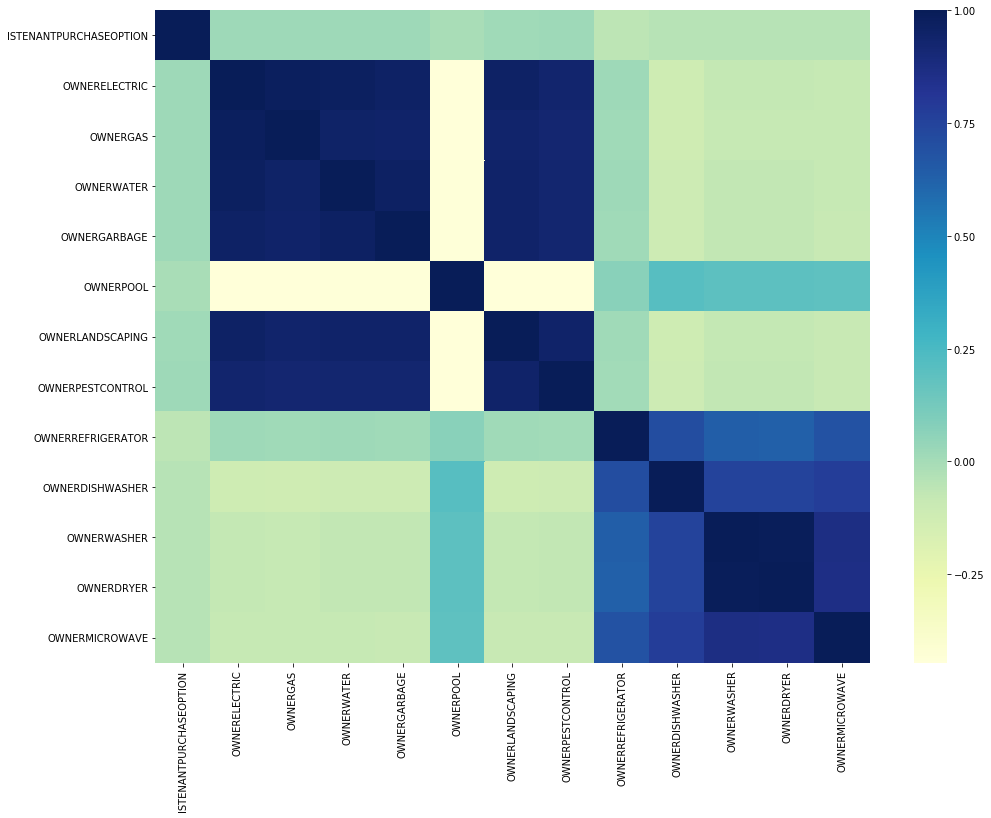

In [73]:
plt.figure(figsize=(16,12))
sns.heatmap(newdf.iloc[:,83:96].corr(), cmap = 'YlGnBu')

Text(0.5, 0, 'allowed funding types')

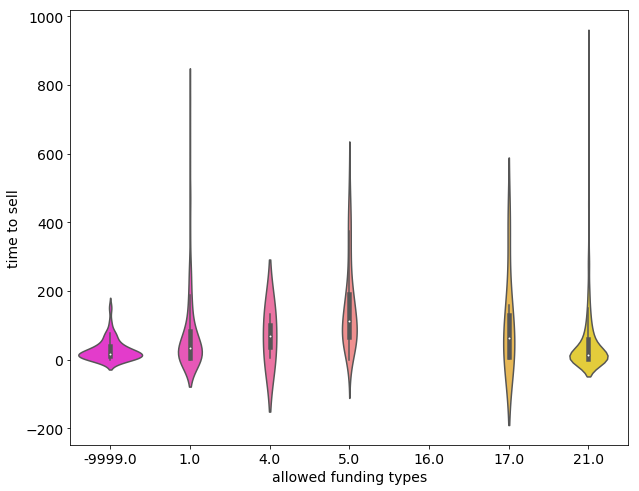

In [74]:
#### diff_days vs. ALLOWED FUNDING TYPES
### 留
plt.figure(figsize=(10,8))
sns.violinplot(z.ALLOWEDFUNDINGTYPES,z.diff_days,palette='spring')
plt.ylabel('time to sell',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('allowed funding types',fontsize=14)

Text(0, 0.5, 'Time to sell')

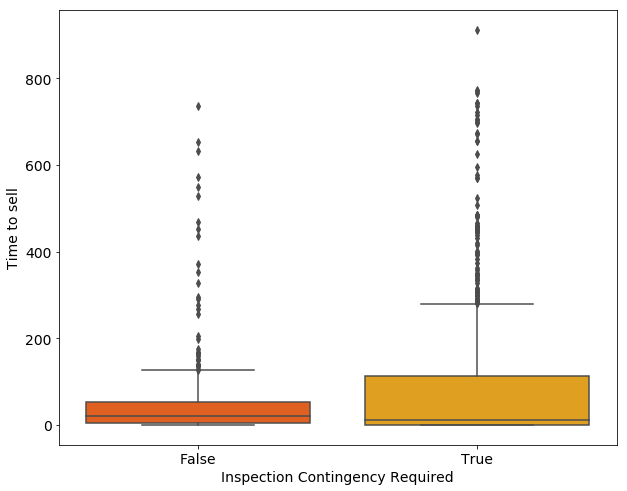

In [75]:
#### diff_days vs. INSPECTION_CONTINGENCY_REQUIRED
#### 留
plt.figure(figsize=(10,8))
sns.boxplot(z.INSPECTION_CONTINGENCY_REQUIRED,z.diff_days,palette='autumn')
plt.xlabel('Inspection Contingency Required',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Time to sell',fontsize=14)

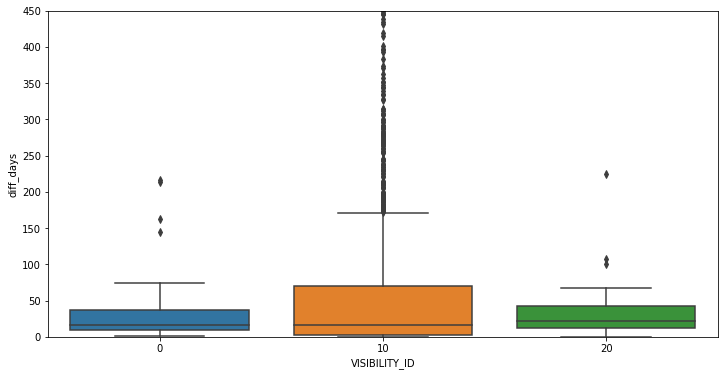

In [76]:
#### diff_days vs. VISIBILITY_ID
#留
plt.figure(figsize=(12,6))
plt.ylim([0,450])
sns.boxplot(z.VISIBILITY_ID,z.diff_days)

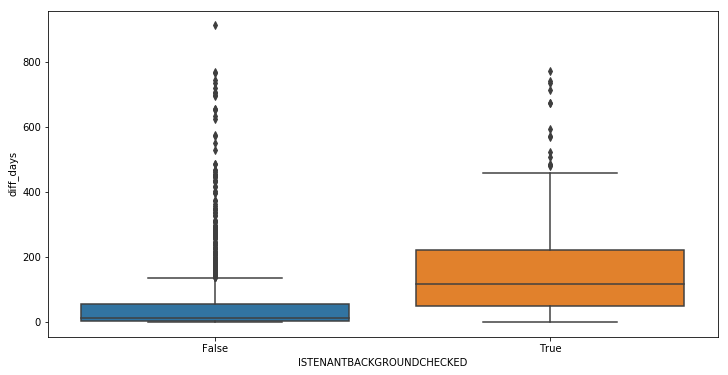

In [77]:
#### diff_days vs. IS TENANT BACKGROUND CHECKED
### 留
plt.figure(figsize=(12,6))
sns.boxplot(z.ISTENANTBACKGROUNDCHECKED,z.diff_days)

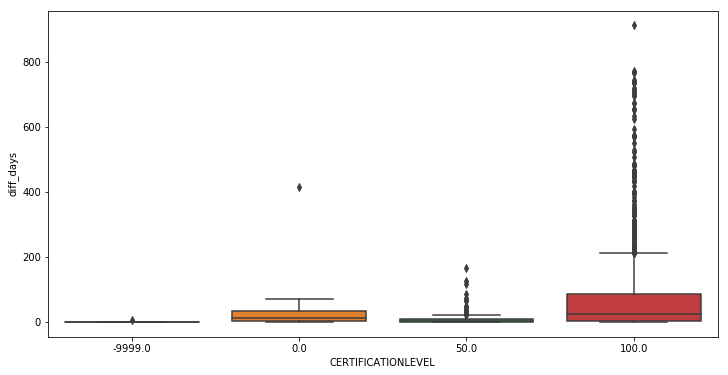

In [78]:
#### diff_days vs. CERTIFICATION LEVEL
#### 删-9999， 留
plt.figure(figsize=(12,6))
sns.boxplot(z.CERTIFICATIONLEVEL,z.diff_days)

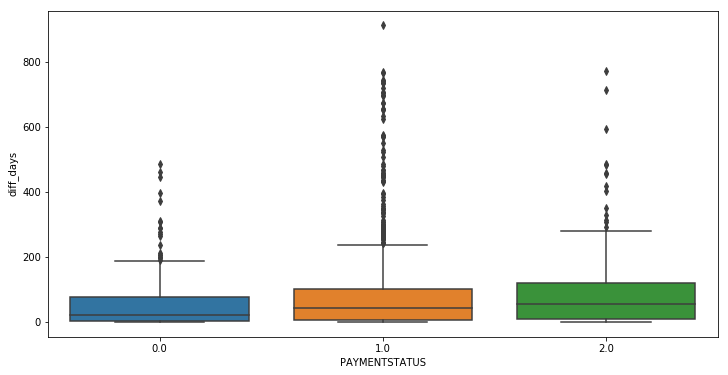

In [79]:
#### diff_days vs. PAYMENTSTATUS
plt.figure(figsize=(12,6))
sns.boxplot(z.PAYMENTSTATUS,z.diff_days)

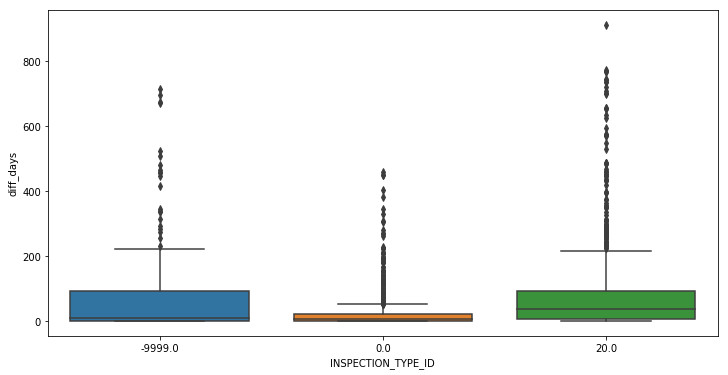

In [80]:
#### diff_days vs. INSPECTION_TYPE_ID
plt.figure(figsize=(12,6))
sns.boxplot(z.INSPECTION_TYPE_ID,z.diff_days)

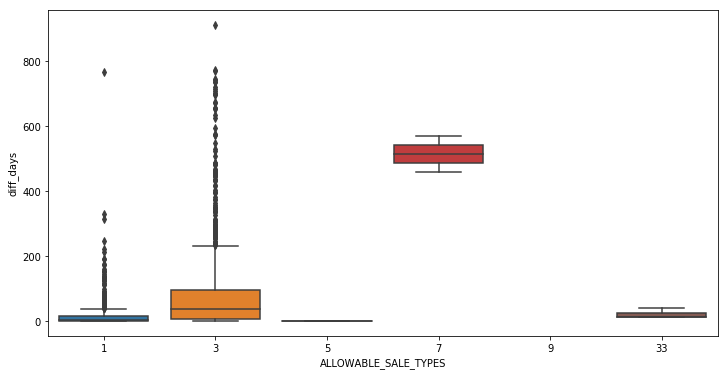

In [81]:
#### diff_days vs. ALLOWABLE_SALE_TYPES
plt.figure(figsize=(12,6))
sns.boxplot(z.ALLOWABLE_SALE_TYPES,z.diff_days)

### HAS OFFER OR NOT

<Figure size 1728x864 with 0 Axes>

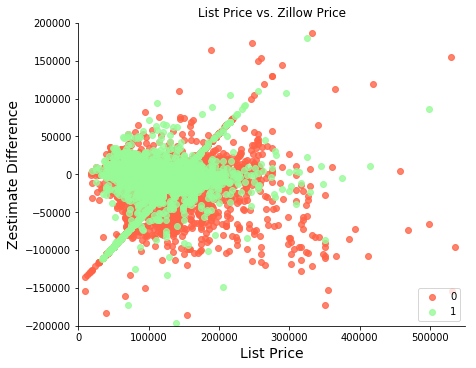

In [82]:
# List Price vs. Zillow Price
plt.figure(figsize=(24,12))
sns.lmplot( x="LIST_PRICE", y="ZESTIMATE_DIFFERENCE", data=newdf, fit_reg=False, hue='OFFER_OR_NOT',
           palette=["tomato", 'palegreen'],legend=False,aspect=16/12)
plt.xlim([0,550000])
plt.ylim([-200000,200000])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('List Price', fontsize=14)
plt.ylabel('Zestimate Difference', fontsize=14)
plt.legend(loc='lower right')
plt.title('List Price vs. Zillow Price')
plt.show()

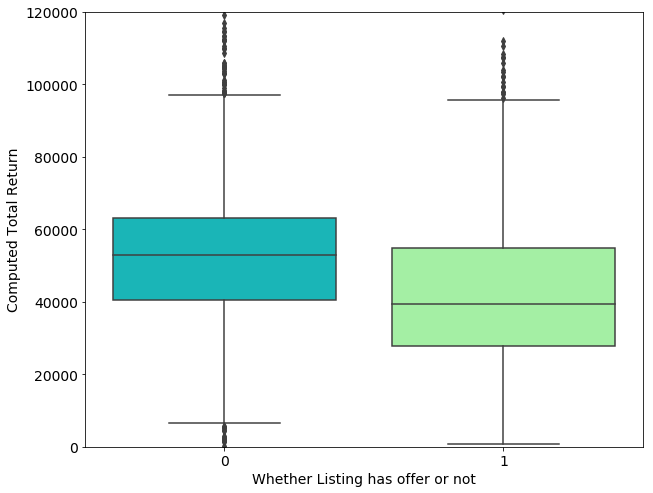

In [83]:
#### COMPUTEDTOTALRETURN 
plt.figure(figsize=(10,8))
sns.boxplot(newdf.OFFER_OR_NOT,newdf.COMPUTEDTOTALRETURN,palette=["darkturquoise", 'palegreen'])
plt.ylim([0,120000])
plt.xlabel('Whether Listing has offer or not', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Computed Total Return', fontsize=14)
plt.yticks(fontsize=14)

plt.show()

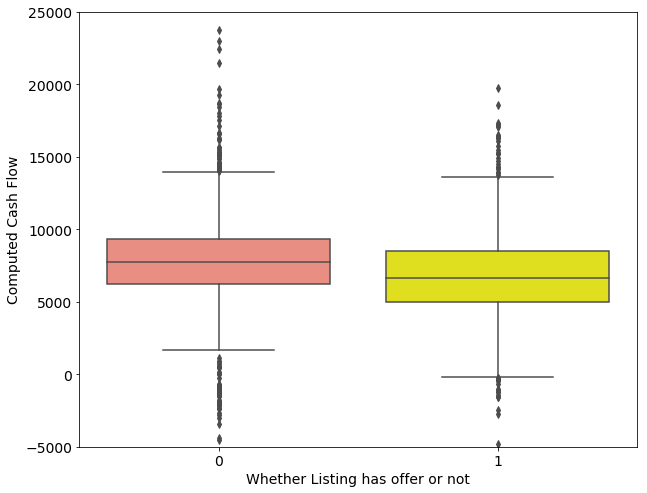

In [84]:
#### COMPUTEDCASHFLOW
plt.figure(figsize=(10,8))
sns.boxplot(newdf.OFFER_OR_NOT,newdf.COMPUTEDCASHFLOW,palette=['salmon','yellow'])
plt.ylim([-5000,25000])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Whether Listing has offer or not', fontsize=14)
plt.ylabel('Computed Cash Flow', fontsize=14)
plt.show()

<Figure size 1008x864 with 0 Axes>

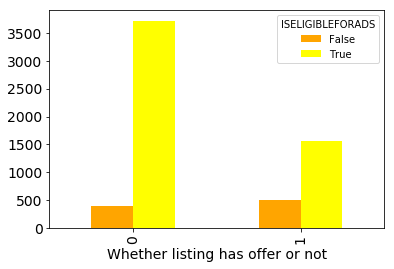

In [85]:
#### ISELIGIBLEFORADS
plt.figure(figsize=(14,12))
pd.crosstab(index=newdf.OFFER_OR_NOT, columns=newdf.ISELIGIBLEFORADS).loc[[0,1]]. plot(kind='bar',color=['orange','yellow'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Whether listing has offer or not', fontsize=14)
#plt.ylabel('Is Eligible for Ads', fontsize=14)
#plt.title('Is Eligible For Ads ',size = 15)
plt.show()

<Figure size 1008x864 with 0 Axes>

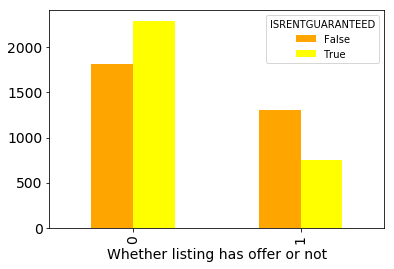

In [86]:
#### IS RENT GUARANTEED
plt.figure(figsize=(14,12))
pd.crosstab(index=newdf.OFFER_OR_NOT, columns=newdf.ISRENTGUARANTEED).loc[[0,1]]. plot(kind='bar',color=['orange','yellow'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Whether listing has offer or not', fontsize=14)
#plt.title('Is Rent Guaranteed',size = 15)
plt.show()

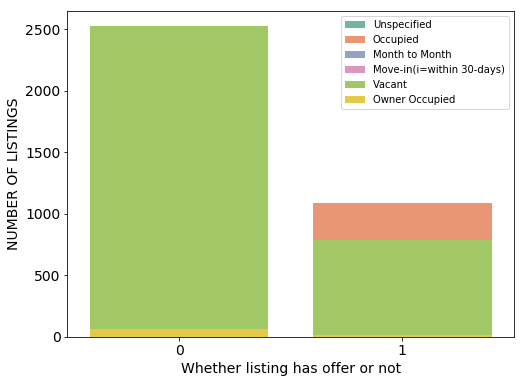

In [87]:
#### Occupacy
plt.figure(figsize=(8,6))
sns.countplot(x=newdf['OFFER_OR_NOT'],hue=newdf['OCCUPANCY'],palette='Set2',dodge=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('NUMBER OF LISTINGS',fontsize=14)
plt.xlabel('Whether listing has offer or not',fontsize=14)
plt.legend(['Unspecified', 'Occupied', 'Month to Month',
                                            'Move-in(i=within 30-days)', 'Vacant','Owner Occupied'],loc='upper right')
#plt.title('Occupacy',size = 15)
plt.show()

<Figure size 1440x1152 with 0 Axes>

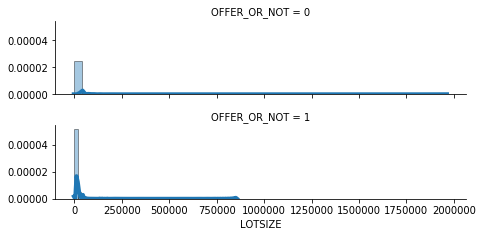

In [88]:
plt.figure(figsize=(20,16))
g = sns.FacetGrid(newdf, row="OFFER_OR_NOT",
                  height=1.7, aspect=4,)
g.map(sns.distplot, "LOTSIZE", hist=True, kde=True,hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4});

<Figure size 1440x1152 with 0 Axes>

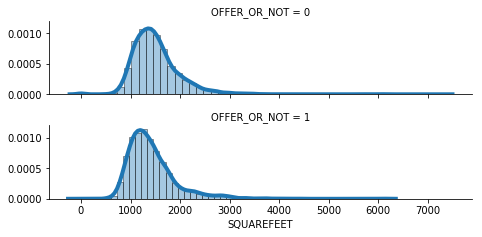

In [89]:
plt.figure(figsize=(20,16))
g = sns.FacetGrid(newdf, row="OFFER_OR_NOT",
                  height=1.7, aspect=4,)
g.map(sns.distplot, "SQUAREFEET", hist=True, kde=True,hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4});

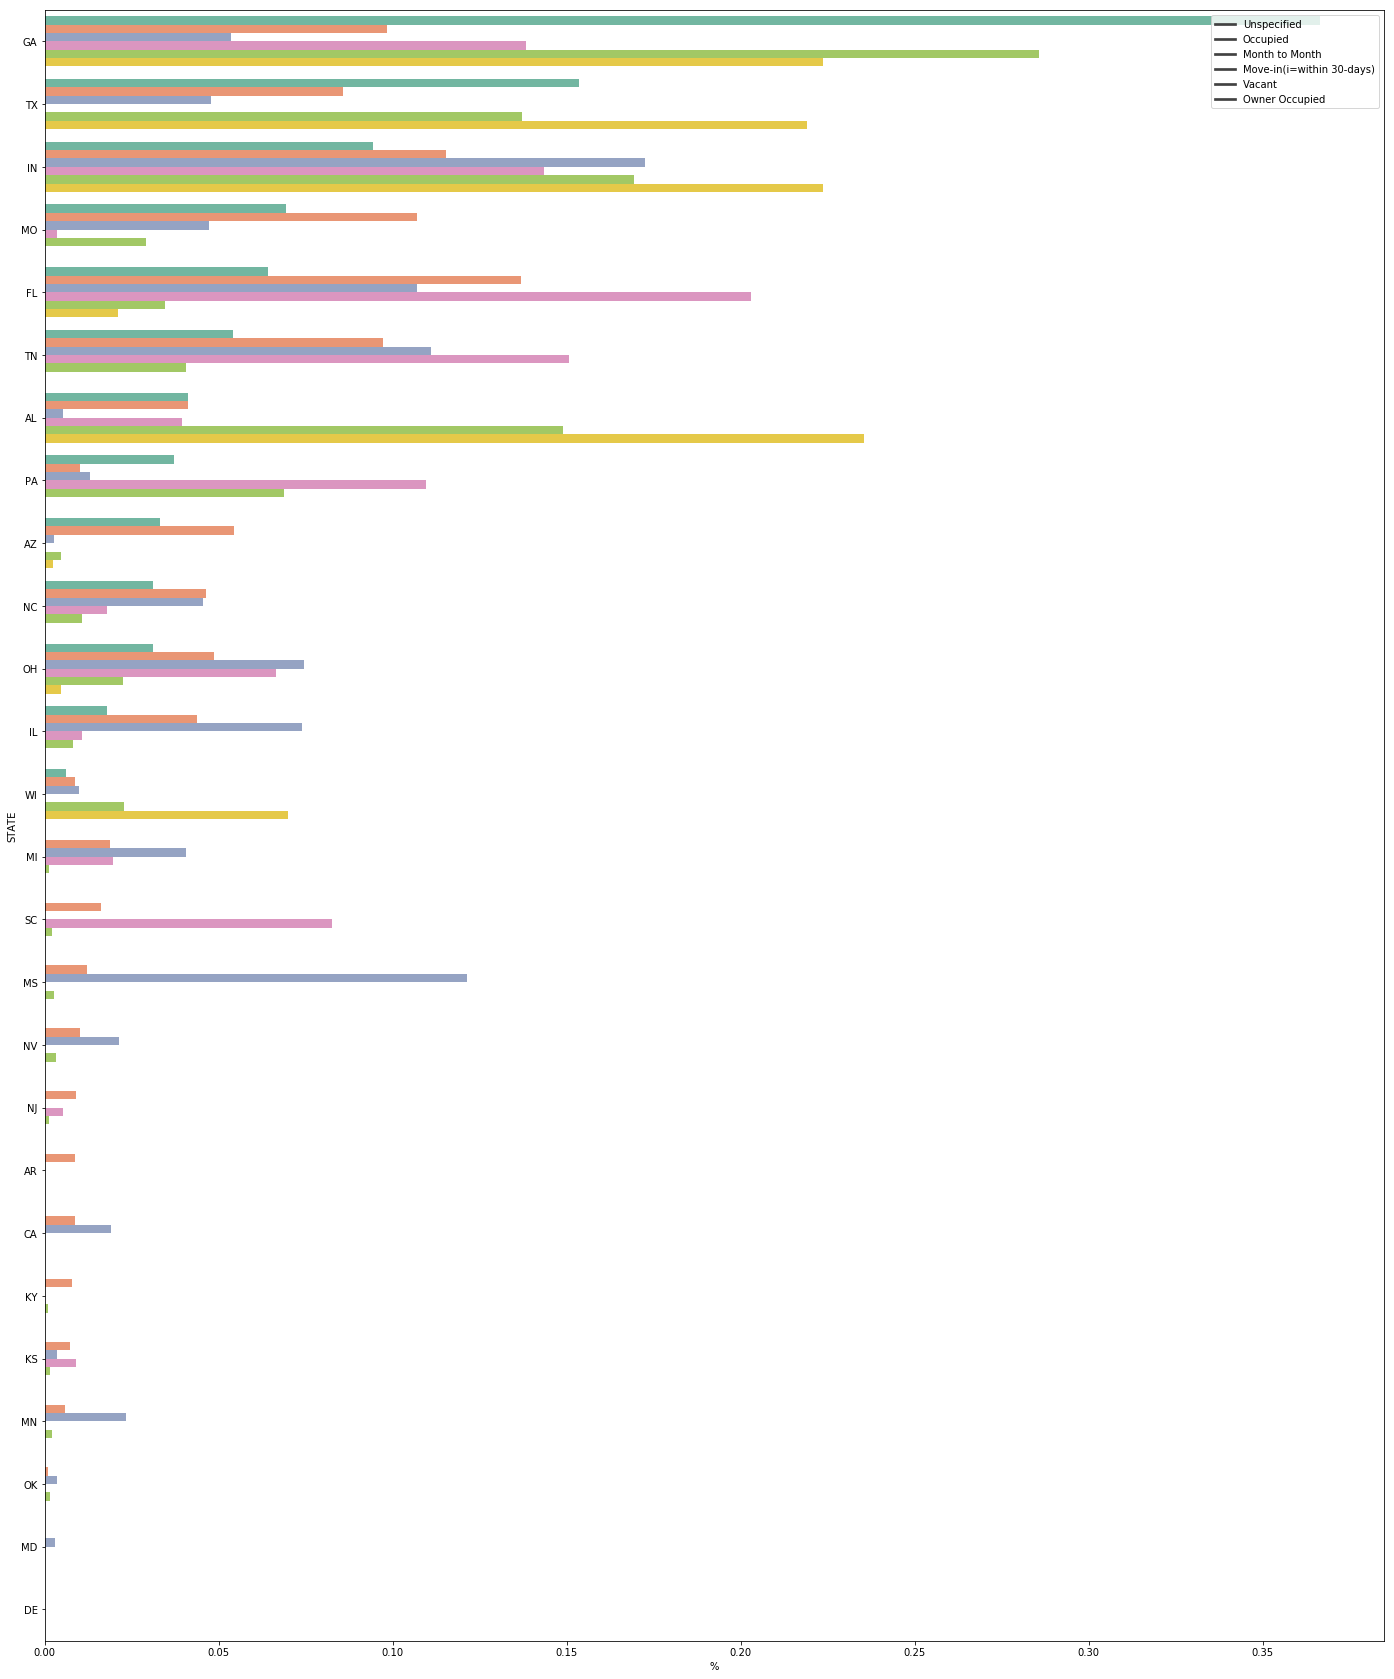

In [90]:
x, y, hue = 'STATE', '%', 'OCCUPANCY'
plt.figure(figsize=(24,30))
prop_df = (df_time[x]
           .groupby(df_time[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=y, y=x, hue=hue, data=prop_df,palette='Set2')
plt.legend(labels=['Unspecified', 'Occupied', 'Month to Month',
                                            'Move-in(i=within 30-days)', 'Vacant','Owner Occupied'])

Text(0, 0.5, 'STATE')

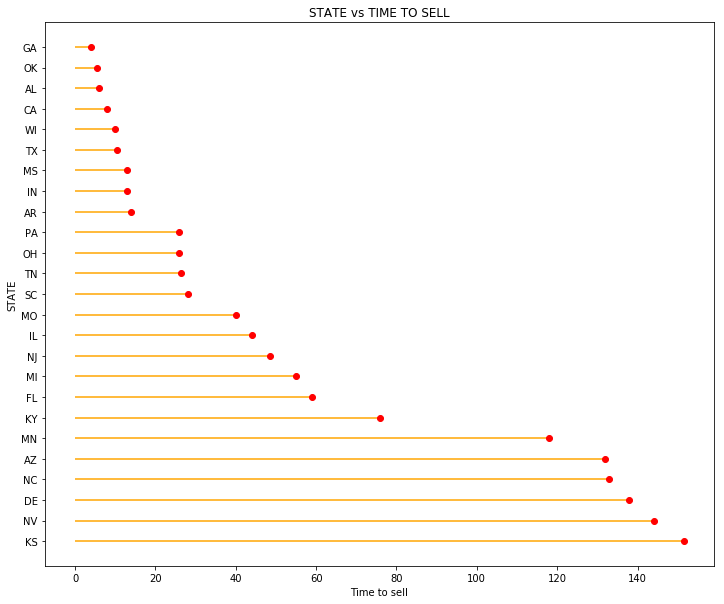

In [91]:
a=listing[['LISTING_ID','LISTING_INITIAL_PUBLISH_TS']]
a=a.dropna()
len(a['LISTING_ID'].unique())

len(df[~df['LISTING_INITIAL_PUBLISH_TS'].isnull()])
df[df['BEDROOMS']==0]
df=df.drop_duplicates(subset=['LISTING_ID'],keep='last')
df_no_offer=df[df['OFFER_OR_NOT']==0]

# Create a dataframe
df_offer=df[df['OFFER_OR_NOT']==1]
STATE=df_offer.groupby('STATE')['diff_days'].median()
STATE=STATE.sort_values(ascending=False)
STATE

plt.figure(figsize=(12,10))
plt.hlines(y=STATE.index, xmin=0, xmax=STATE.iloc[:], color='orange')
plt.plot(STATE.iloc[:],STATE.index, "o",color='red')
 
# Add titles and axis names
plt.yticks(STATE.index)
plt.title("STATE vs TIME TO SELL")
plt.xlabel('Time to sell')
plt.ylabel('STATE')

Text(0.5, 1.0, 'BEDROOMS VS SQUAREFEET (no offer)')

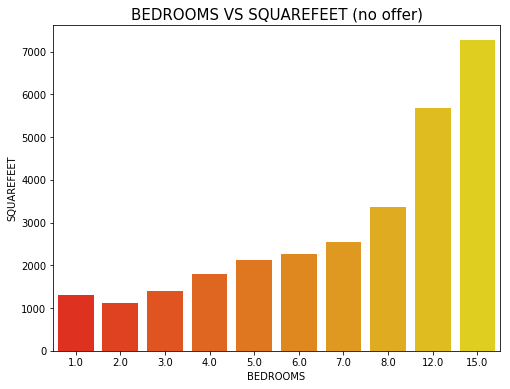

In [92]:
BED_no=df_no_offer.groupby('BEDROOMS')['SQUAREFEET'].median()
BED_no=BED_no.sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(BED_no.index,BED_no[:],palette='autumn')
plt.title('BEDROOMS VS SQUAREFEET (no offer)',size = 15)

Text(0.5, 1.0, 'BEDROOMS VS SQUAREFEET (offer)')

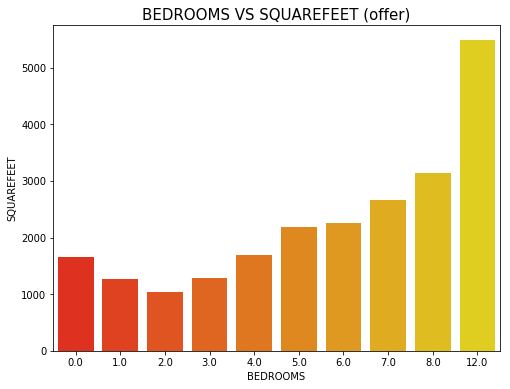

In [93]:
BED=df_offer.groupby('BEDROOMS')['SQUAREFEET'].median()
BED=BED.sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(BED.index,BED[:],palette='autumn')
plt.title('BEDROOMS VS SQUAREFEET (offer)',size = 15)

Text(0.5, 1.0, 'LISTINGS WITHOUT OFFER vs BEDROOMS')

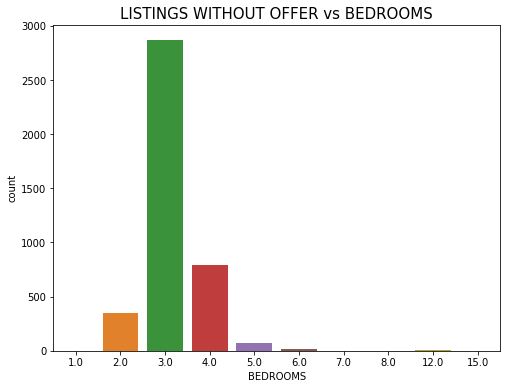

In [94]:
plt.figure(figsize=(8,6))
sns.countplot(df_no_offer['BEDROOMS'])
plt.title("LISTINGS WITHOUT OFFER vs BEDROOMS",size=15)

Text(0.5, 1.0, 'LISTINGS WITH OFFER vs BEDROOMS')

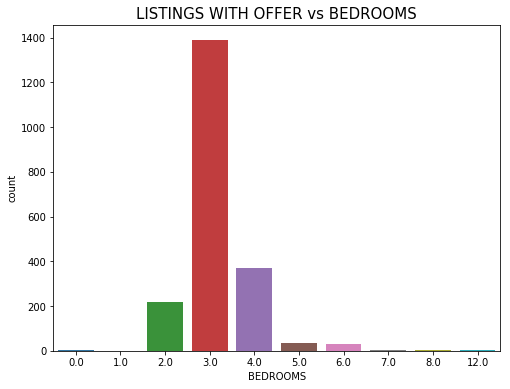

In [95]:
plt.figure(figsize=(8,6))
sns.countplot(df_offer['BEDROOMS'])
plt.title("LISTINGS WITH OFFER vs BEDROOMS",size=15)

Text(0.5, 1.0, 'BATHROOMS VS SQUAREFEET (no offer)')

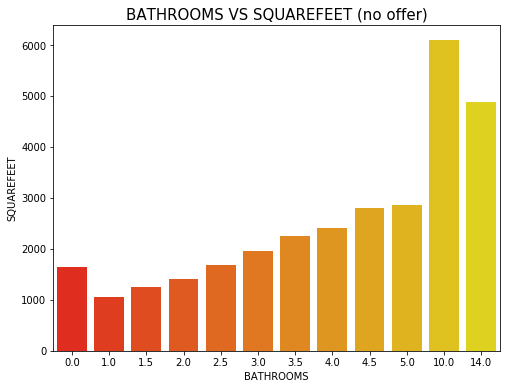

In [96]:
plt.figure(figsize=(8,6))
BATH=df_offer.groupby('BATHROOMS')['SQUAREFEET'].median()
BATH=BATH.sort_values(ascending=False)
sns.barplot(BATH.index,BATH[:],palette='autumn')
plt.title('BATHROOMS VS SQUAREFEET (no offer)',size = 15)

Text(0.5, 1.0, 'BATHROOMS VS SQUAREFEET (offer)')

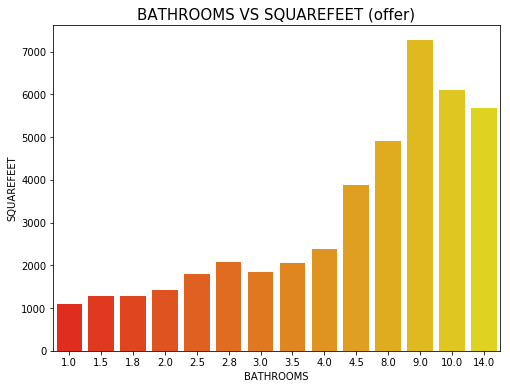

In [97]:
plt.figure(figsize=(8,6))
BATH_no=df_no_offer.groupby('BATHROOMS')['SQUAREFEET'].median()
BATH_no=BATH_no.sort_values(ascending=False)
sns.barplot(BATH_no.index,BATH_no[:],palette='autumn')
plt.title('BATHROOMS VS SQUAREFEET (offer)',size = 15)

In [98]:
df_no_offer['BATHROOMS']=df_no_offer['BATHROOMS'].replace(2.8,2.5)
df_no_offer['BATHROOMS']=df_no_offer['BATHROOMS'].replace(1.8,1.5)

Text(0.5, 1.0, 'NUMBER OF LISTINGS vs BATHROOMS (no offer)')

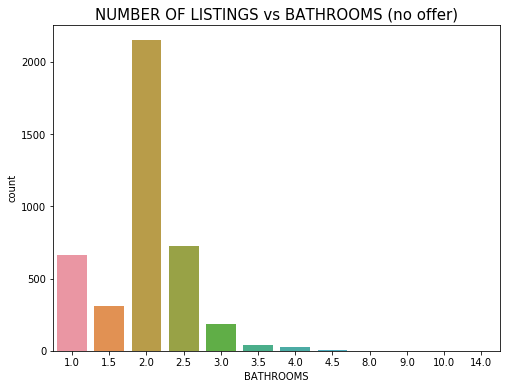

In [99]:
plt.figure(figsize=(8,6))
sns.countplot(df_no_offer['BATHROOMS'])
plt.title('NUMBER OF LISTINGS vs BATHROOMS (no offer)',size = 15)

Text(0.5, 1.0, 'NUMBER OF LISTINGS vs BATHROOMS (offer)')

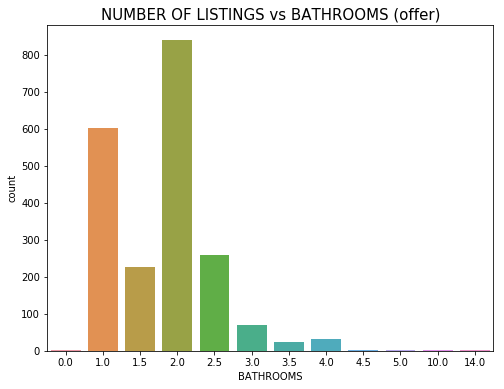

In [100]:
plt.figure(figsize=(8,6))
sns.countplot(df_offer['BATHROOMS'])
plt.title('NUMBER OF LISTINGS vs BATHROOMS (offer)',size = 15)

Text(0.5, 1.0, 'NUMBER OF OFFERS OF DIFFERENT LISTING SOURCES')

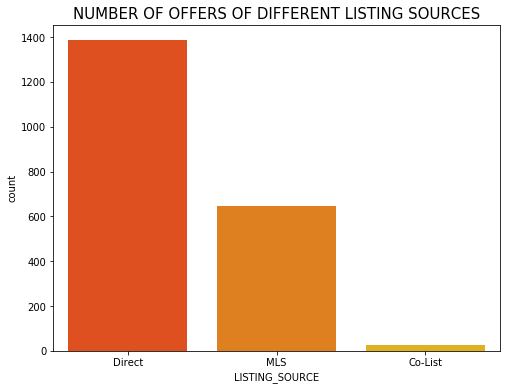

In [101]:
plt.figure(figsize=(8,6))
sns.countplot(df_offer['LISTING_SOURCE'],palette='autumn')
plt.title('NUMBER OF OFFERS OF DIFFERENT LISTING SOURCES',size = 15)

Text(0.5, 1.0, 'PERCENTAGE OF GETTING OFFERS OF DIFFERENT LISTING SOURCES')

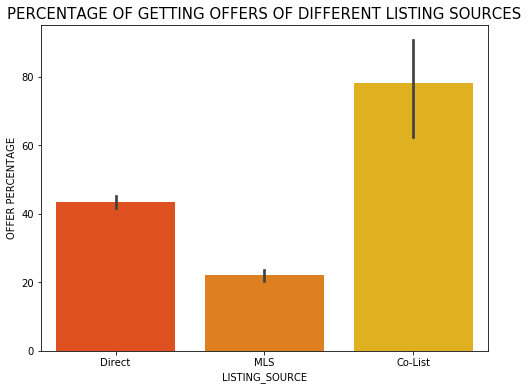

In [102]:
plt.figure(figsize=(8,6))
sns.barplot(x='LISTING_SOURCE',y='OFFER_OR_NOT',data=df,estimator=lambda x:sum(x==1)*100.0/len(x),palette='autumn')
plt.ylabel('OFFER PERCENTAGE')
plt.title('PERCENTAGE OF GETTING OFFERS OF DIFFERENT LISTING SOURCES',size = 15)

Text(0.5, 1.0, 'NUMBER OF LISTINGS PUBLISHED IN DIFFERENT MONTHS')

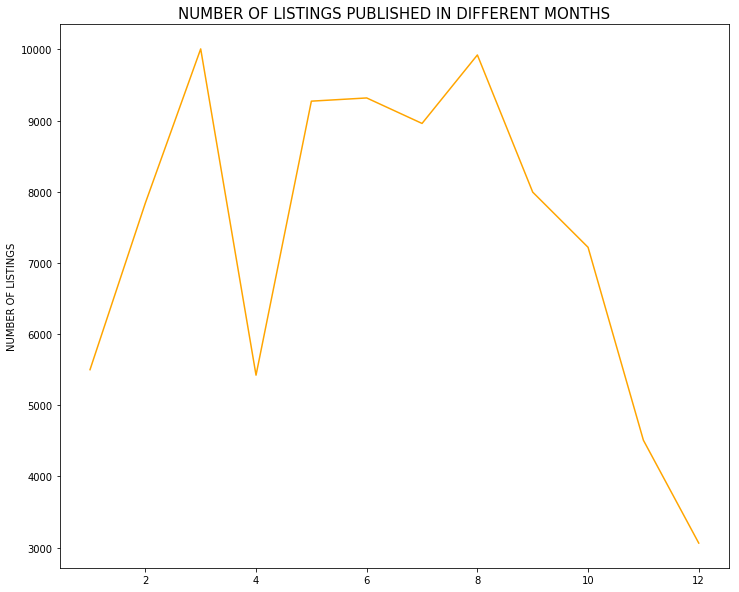

In [103]:
plt.figure(figsize=(12,10))
plt.plot(df_time.groupby('INITIAL_PUBLISH_MONTH').count()['LISTING_STATUS'],color='orange')
plt.ylabel('NUMBER OF LISTINGS')
plt.title('NUMBER OF LISTINGS PUBLISHED IN DIFFERENT MONTHS',size = 15)

Text(0.5, 1.0, 'NUMBER OF LISTINGS PUBLISHED IN DIFFERENT MONTHS GROUPBY OCCUPANCY')

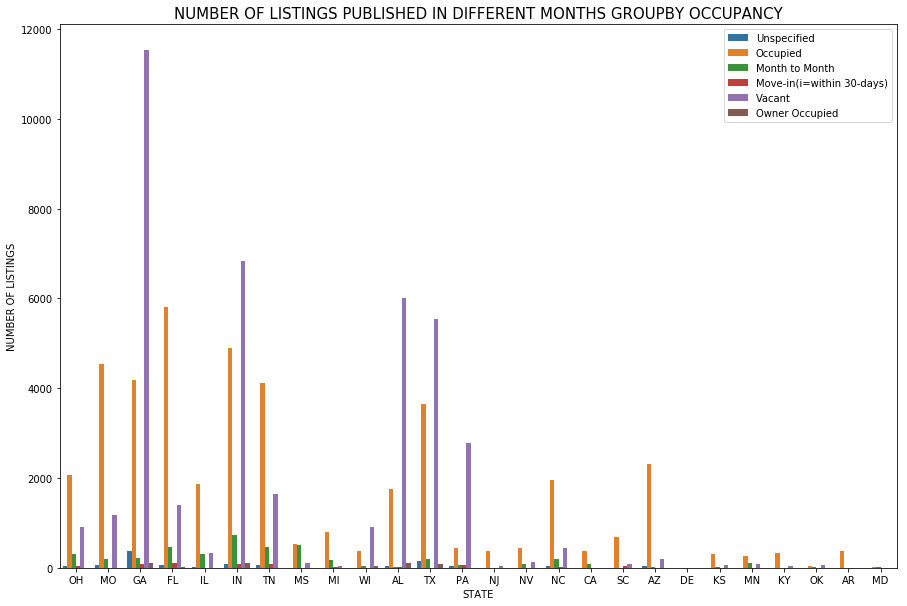

In [106]:
plt.figure(figsize=(15,10))
sns.countplot(x=df_time['STATE'],hue=df_time['OCCUPANCY'],orient='h')
plt.ylabel('NUMBER OF LISTINGS')
plt.legend(['Unspecified', 'Occupied', 'Month to Month',
                                            'Move-in(i=within 30-days)', 'Vacant','Owner Occupied'],loc='upper right')
plt.title('NUMBER OF LISTINGS PUBLISHED IN DIFFERENT MONTHS GROUPBY OCCUPANCY',size = 15)

In [109]:
PERCENTAGE=df_time['OCCUPANCY'].groupby(df_time['STATE']).value_counts(normalize=True).rename('RATE').reset_index()

PERCENTAGE1=PERCENTAGE[PERCENTAGE['OCCUPANCY']==1].sort_values(by='RATE',ascending=False)
PERCENTAGE_VACANCY=PERCENTAGE[PERCENTAGE['OCCUPANCY']==100].sort_values(by='RATE',ascending=False)
PERCENTAGE_ONWEROCCUPIED=PERCENTAGE[PERCENTAGE['OCCUPANCY']==110].sort_values(by='RATE',ascending=False)

PERCENTAGE.sort_values('STATE')

,STATE,OCCUPANCY,RATE
0,AL,100.0,0.756539
1,AL,1.0,0.220070
2,AL,110.0,0.012701
3,AL,0.0,0.005156
4,AL,10.0,0.002767
5,AL,30.0,0.002767
6,AR,1.0,1.000000
10,AZ,10.0,0.004723
9,AZ,0.0,0.012987
11,AZ,110.0,0.000394


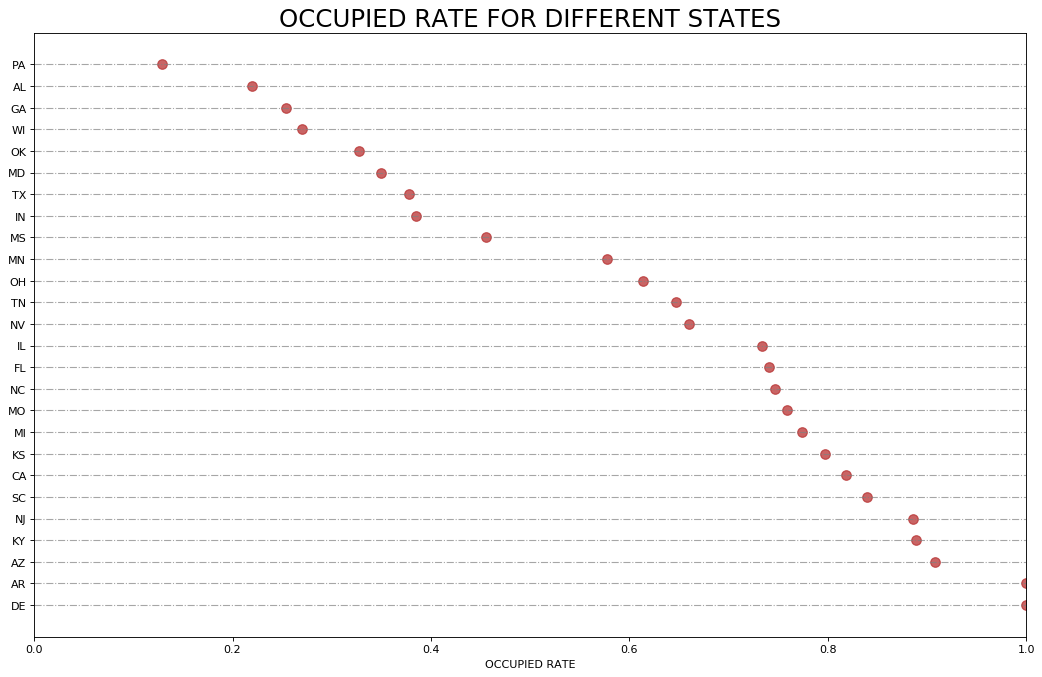

In [111]:
# Prepare Data
#df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
#df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
#df.sort_values('cty', inplace=True)
#df.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.hlines(y=PERCENTAGE1['STATE'], xmin=0, xmax=1,color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=PERCENTAGE1['STATE'], x=PERCENTAGE1['RATE'], s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('OCCUPIED RATE FOR DIFFERENT STATES', fontdict={'size':22})
ax.set_xlabel('OCCUPIED RATE')
ax.set_yticks(PERCENTAGE1['STATE'])
ax.set_yticklabels(PERCENTAGE1['STATE'], fontdict={'horizontalalignment': 'right'})
ax.set_xlim(0, 1)
plt.show()

Text(0.5, 1.0, 'OCCUPIED RATE FOR DIFFERENT STATES')

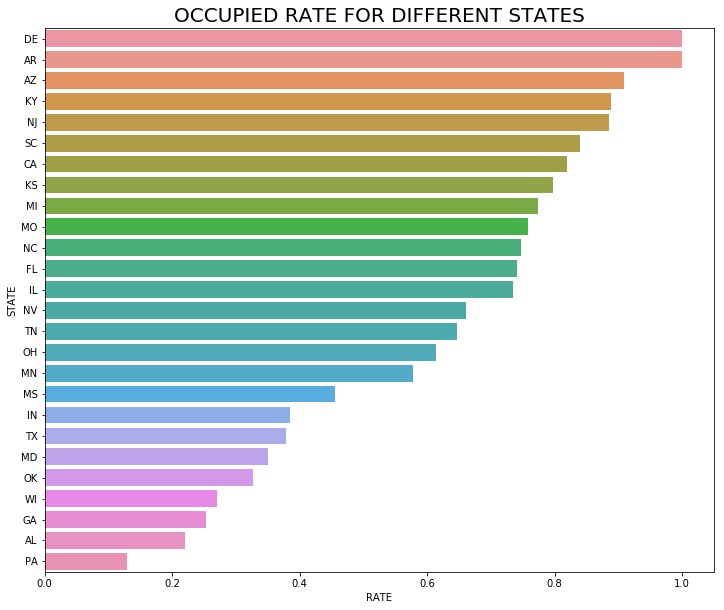

In [112]:
plt.figure(figsize=(12,10))
sns.barplot(PERCENTAGE1['RATE'],PERCENTAGE1['STATE'])
plt.title('OCCUPIED RATE FOR DIFFERENT STATES',size=20)

Text(0.5, 1.0, 'VACANCY RATE FOR DIFFERENT STATES')

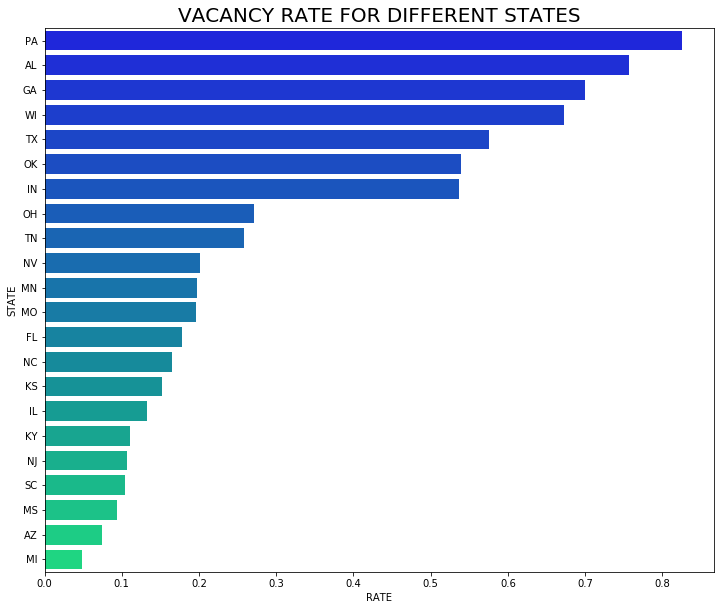

In [113]:
plt.figure(figsize=(12,10))
sns.barplot(PERCENTAGE_VACANCY['RATE'],PERCENTAGE_VACANCY['STATE'],palette='winter')
plt.title('VACANCY RATE FOR DIFFERENT STATES',size=20)

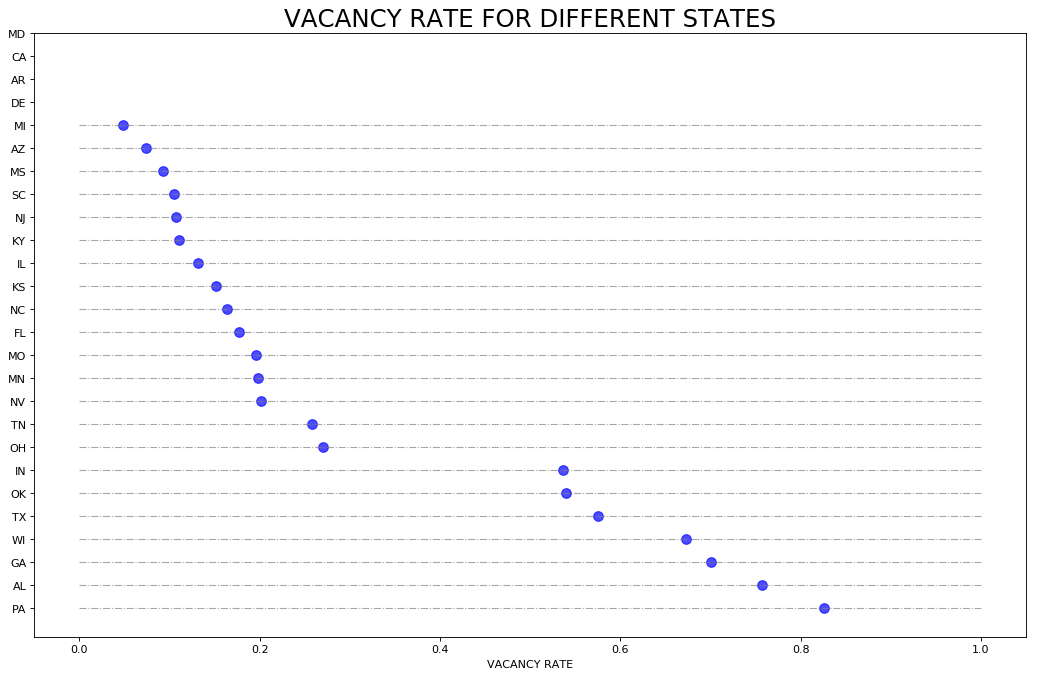

In [114]:
# Title, Label, Ticks and Ylim
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.hlines(y=PERCENTAGE_VACANCY['STATE'], xmin=0, xmax=1,color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(PERCENTAGE_VACANCY['RATE'],PERCENTAGE_VACANCY['STATE'], s=75, color='blue', alpha=0.7)
ax.set_title('VACANCY RATE FOR DIFFERENT STATES', fontdict={'size':22})
ax.set_xlabel('VACANCY RATE')
ax.set_yticks(PERCENTAGE1['STATE'])
ax.set_yticklabels(PERCENTAGE1['STATE'], fontdict={'horizontalalignment': 'right'})
plt.show()

Text(0.5, 1.0, 'ONWER OCCUPIED RATE FOR DIFFERENT STATES')

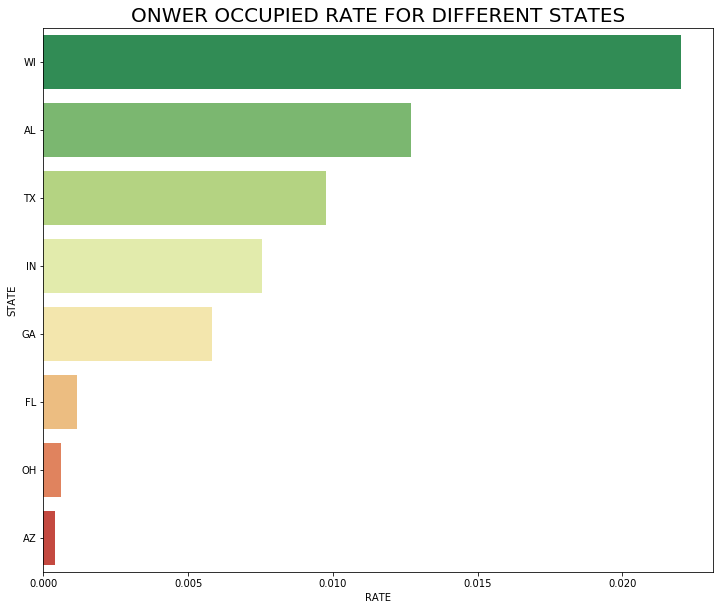

In [115]:
plt.figure(figsize=(12,10))
sns.barplot(PERCENTAGE_ONWEROCCUPIED['RATE'].sort_values(),PERCENTAGE_ONWEROCCUPIED['STATE'],palette='RdYlGn_r')
plt.title('ONWER OCCUPIED RATE FOR DIFFERENT STATES',size=20)

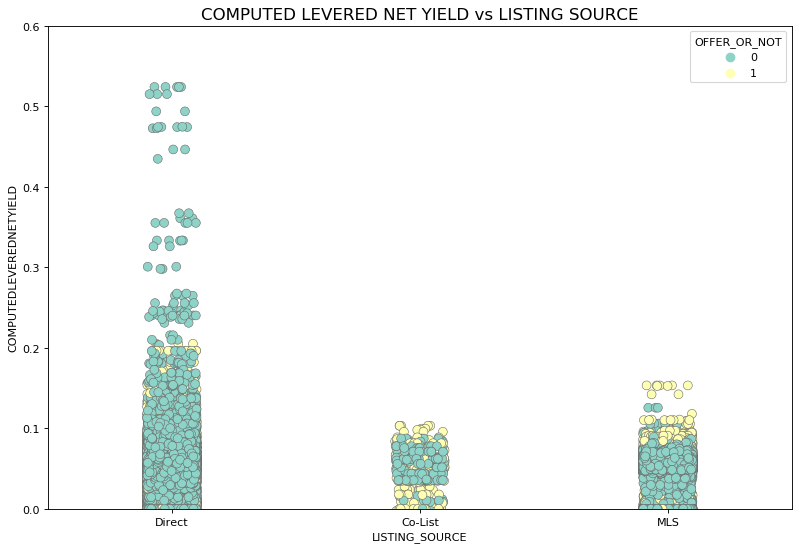

In [116]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(12,8), dpi= 80)    
sns.stripplot(df_time['LISTING_SOURCE'], df_time['COMPUTEDLEVEREDNETYIELD'],hue=df_time['OFFER_OR_NOT'],palette='Set3', size=8, ax=ax, linewidth=.5)
plt.ylim([0,0.6])
# Decorations
plt.title('COMPUTED LEVERED NET YIELD vs LISTING SOURCE', fontsize=15)
plt.show()

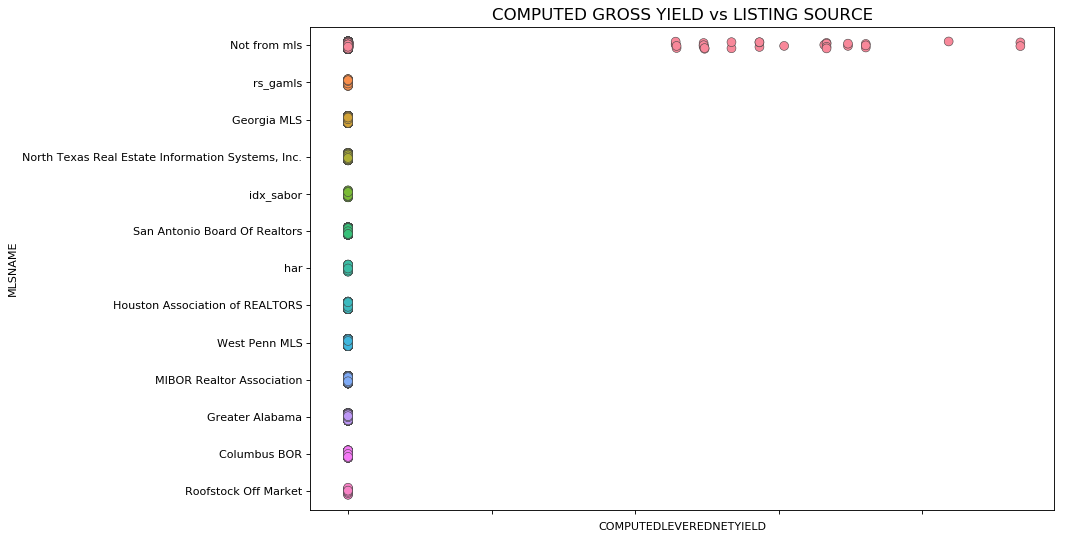

In [117]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(12,8), dpi= 80)    
a=sns.stripplot(df_time['COMPUTEDLEVEREDNETYIELD'],df_time['MLSNAME'], size=8, ax=ax, linewidth=.5)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
a.set_xticklabels(labels,rotation=90)
# Decorations
plt.title('COMPUTED GROSS YIELD vs LISTING SOURCE', fontsize=15)
plt.show()

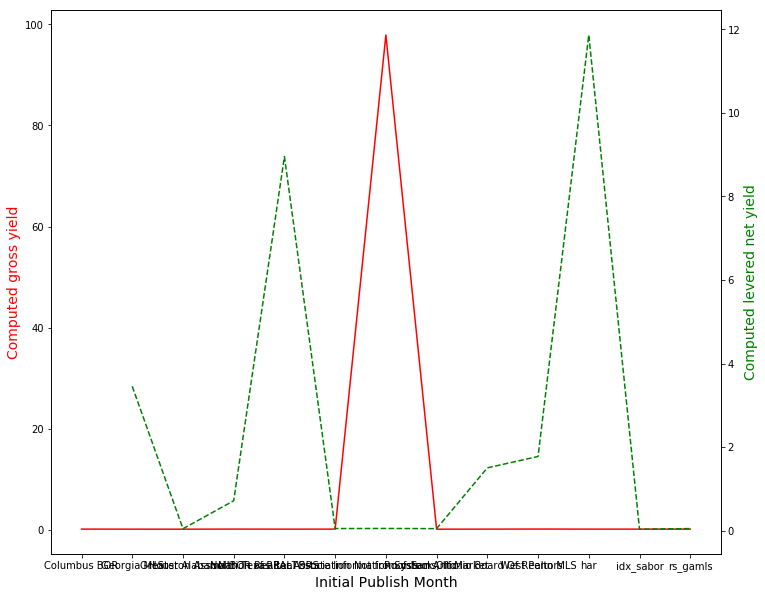

In [118]:
fig,ax = plt.subplots(figsize=(12,10))
ax.plot(df_time.groupby('MLSNAME')['COMPUTED_GROSS_YIELD'].mean(),'-r')
ax.set_xlabel('Initial Publish Month',fontsize=14)
ax.set_ylabel('Computed gross yield',color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot(df_time.groupby('INITIAL_PUBLISH_MONTH')['COMPUTEDLEVEREDNETYIELD'].mean(),'--g')
ax2.set_ylabel('Computed levered net yield',color="green",fontsize=14)
plt.show()

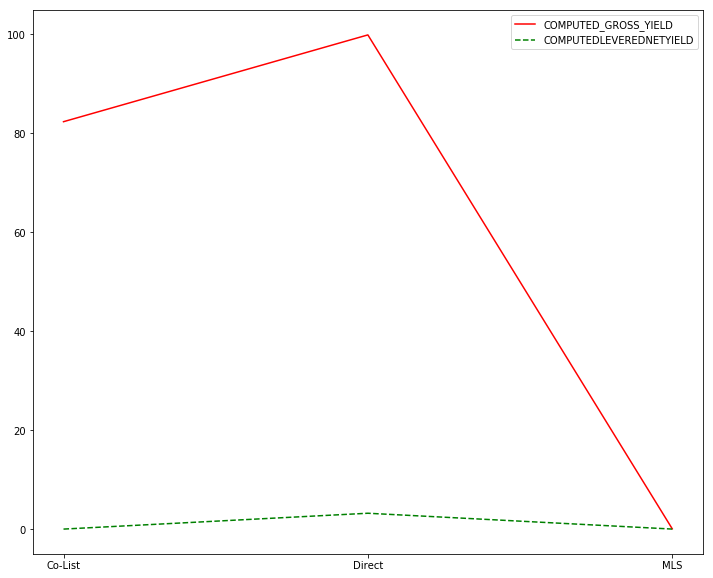

In [119]:
plt.figure(figsize=(12,10))
plt.plot(df_time.groupby('LISTING_SOURCE')['COMPUTED_GROSS_YIELD'].mean(),'-r')
plt.plot(df_time.groupby('LISTING_SOURCE')['COMPUTEDLEVEREDNETYIELD'].mean(),'--g')
plt.legend(loc='upper right')

In [122]:
df_time_offer=df_time[df_time['diff_days']!=920]

In [124]:
aa=listing[['LISTING_ID','CITY','ZIP','COUNTY']].drop_duplicates()
aa['COUNTY']=aa['COUNTY'].fillna('kongzhi')
d=aa[aa['LISTING_ID']==1625006].index
aa=aa.drop(d)
aa=aa.drop_duplicates(subset='LISTING_ID')

city_dict=aa.set_index('LISTING_ID')['CITY'].to_dict()
zip_dict=aa.set_index('LISTING_ID')['ZIP'].to_dict()
county_dict=aa.set_index('LISTING_ID')['CITY'].to_dict()

df['CITY']=df['LISTING_ID'].map(lambda x: city_dict[x])
df['ZIP']=df['LISTING_ID'].map(lambda x: zip_dict[x])
df['COUNTY']=df['LISTING_ID'].map(lambda x: county_dict[x])

df.to_csv('eda.csv',index=False)
df1=df.drop(df[df['OFFER_PRICE']==-9].index)

## Training Dataset

In [125]:
import pandas as pd
pd.set_option('max_columns',1000)
pd.set_option('max_rows',1000)
import datetime
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm

In [126]:
buyer=pd.read_csv('roofstock_marketplace_buyers_full.csv')
listing=pd.read_csv('roofstock_marketplace_listing_historical_full.csv')
offer=pd.read_csv('roofstock_marketplace_offers_full.csv')
transaction=pd.read_csv('roofstock_marketplace_transactions_full.csv')
site=pd.read_csv('site_activity.csv')
final=pd.read_csv('final_df.csv')

final['EVENT_UTC']=pd.to_datetime(final['EVENT_UTC'])
final['CREATED_TS']=pd.to_datetime(final['CREATED_TS'])
final['diff_days']=final.apply(lambda x: x['EVENT_UTC']- x['CREATED_TS'], axis=1)
final['diff_days']=final['diff_days'].map(lambda x: x.days)

listing1=listing[listing['LIST_PRICE'].isnull()==False]
total_nooffer=listing1[~listing1['LISTING_ID'].isin(list(final['LISTING_ID'].unique()))]
nooffer=total_nooffer.groupby('LISTING_ID').apply(lambda t: t[t.REC_START_TS==t.REC_START_TS.min()]).drop_duplicates()

nooffer['EVENT_UTC']='2019-08-18 19:16:50.144 +0000'
nooffer['OFFER_ID']=1234567
nooffer['OFFER_PRICE']=-9999
nooffer['discount']=1
nooffer['diff_days']=1001
nooffer=nooffer.drop('PROPERTYSUMMARY',axis=1)

use_df=pd.concat([final,nooffer])

In [127]:
#use_listing=listing.sort_values("REC_END_TS",ascending=True)
use_listing=listing.dropna(subset=['LIST_PRICE'])
#use_listing=use_listing.drop_duplicates(subset=['LISTING_ID','LIST_PRICE'],keep='first')
#use_listing=use_listing.reset_index().drop('index',axis=1)

In [128]:
dup_list=list(set(use_listing)-set(droplist))
use_listing=use_listing.sort_values("REC_END_TS",ascending=True)
use_listing=use_listing.drop_duplicates(subset=dup_list,keep='first')
offer0=offer[offer['OFFER_DIRECTION']=='BuyerToSeller'][['EVENT_UTC','OFFER_PRICE','LISTING_ID']]
tt=transaction[transaction['OFFER_ID']==-99][['EVENT_UTC','SALE_PRICE','LISTING_ID']]
tt=tt.rename(columns={'SALE_PRICE':'OFFER_PRICE'})
offer0=pd.concat([offer0,tt])


In [129]:
utc=[]
offerprice=[]
for i in tqdm(list(use_listing.index)):
    c_id=use_listing['LISTING_ID'][i]
    c_time=use_listing['REC_END_TS'][i]
    use_offer=offer0[offer0['LISTING_ID']==c_id]
    if len(use_offer)==0:
        utc.append('2020-08-18 19:16:50.144 +0011')
        offerprice.append(-9)
    else:
        offer1=use_offer[use_offer['EVENT_UTC']>c_time]
        if len(offer1)==0:
            utc.append('BUXING')
            offerprice.append(-9)
        else:
            offer1.sort_values("EVENT_UTC",inplace=True,ascending=True)
            utc.append(offer1.iloc[0]['EVENT_UTC'])
            offerprice.append(offer1.iloc[0]['OFFER_PRICE'])

100%|██████████| 214410/214410 [16:16<00:00, 219.66it/s] 


In [130]:
use_listing['EVENT_UTC']=utc
use_listing['OFFER_PRICE']=offerprice

In [133]:
f_use_listing=use_listing.drop(use_listing[use_listing['EVENT_UTC']=='BUXING'].index)
f_use_listing['EVENT_UTC']=pd.to_datetime(f_use_listing['EVENT_UTC'])
f_use_listing['CREATED_TS']=pd.to_datetime(f_use_listing['CREATED_TS'])
f_use_listing['diff_days']=f_use_listing.apply(lambda x: x['EVENT_UTC']- x['CREATED_TS'], axis=1)
f_use_listing['diff_days']=f_use_listing['diff_days'].map(lambda x: x.days)
f_use_listing=f_use_listing.drop('PROPERTYSUMMARY',axis=1)
for i in list(f_use_listing[f_use_listing['EVENT_UTC']=='2020-08-18 19:16:50.144 +0011'].index):
    f_use_listing.set_value(i, 'diff_days', 1015)

In [134]:
f_use_listing.to_csv('latter_final.csv')

In [135]:
buyer=pd.read_csv('roofstock_marketplace_buyers_full.csv')
listing=pd.read_csv('roofstock_marketplace_listing_historical_full.csv')
offer=pd.read_csv('roofstock_marketplace_offers_full.csv')
transaction=pd.read_csv('roofstock_marketplace_transactions_full.csv')
site=pd.read_csv('site_activity.csv')

In [136]:
aa=listing[listing['LISTING_PUBLISH_TS'].isnull()==False]
bb=aa[aa['LISTING_INITIAL_PUBLISH_TS'].isnull()==True]

In [137]:
aa=listing[listing['LISTING_INITIAL_PUBLISH_TS'].isnull()==True]
ll=list(aa['LISTING_ID'].unique())

In [138]:
cc=(offer['LISTING_ID']+transaction['LISTING_ID']).unique()

In [139]:
xx=0
for i in ll:
    if i in cc:
        xx=+1

In [140]:
pp=f_use_listing.dropna(subset=['LISTING_INITIAL_PUBLISH_TS','LISTING_PUBLISH_TS','LISTING_INTIAL_PUBLISH_DATE','LISTING_PUBLISH_DATE'],axis=0,how='all') 


In [141]:
dd_list=list(set(f_use_listing['LISTING_ID'].unique())-set(pp['LISTING_ID'].unique()))

In [142]:
abc=listing[['LISTING_ID','LISTING_INITIAL_PUBLISH_TS']].dropna().drop_duplicates().groupby('LISTING_ID').apply(lambda t: t[t.LISTING_INITIAL_PUBLISH_TS==t.LISTING_INITIAL_PUBLISH_TS.min()]).drop_duplicates()


In [143]:
abc=abc.drop('LISTING_ID',axis=1).reset_index().drop('level_1',axis=1)

In [144]:
abc_dict=abc.set_index('LISTING_ID')['LISTING_INITIAL_PUBLISH_TS'].to_dict()

In [145]:
df=pd.read_csv('variables4.csv')
df=df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
STATE=pd.get_dummies(df['STATE'],dummy_na=True,prefix='STATE')
df=pd.concat([df,STATE],axis=1)
df=df.drop('STATE',axis=1)

In [147]:
df['EVENT_UTC']=list(f_use_listing['EVENT_UTC'])
df['LISTING_ID']=list(f_use_listing['LISTING_ID'])

In [149]:
df=df[df['LISTING_ID'].isin(list(abc['LISTING_ID']))]

In [151]:
df['LISTING_INITIAL_PUBLISH_TS']=df['LISTING_ID'].map(lambda x:abc_dict[x])
df['EVENT_UTC']=pd.to_datetime(df['EVENT_UTC'])
df['LISTING_INITIAL_PUBLISH_TS']=pd.to_datetime(df['LISTING_INITIAL_PUBLISH_TS'])
df['diff_days']=df.apply(lambda x: x['EVENT_UTC']- x['LISTING_INITIAL_PUBLISH_TS'], axis=1)
df['diff_days']=df['diff_days'].map(lambda x: x.days)

In [152]:
for i in df[df['EVENT_UTC']=='2020-08-18 19:05:50.144'].index:
    df.set_value(i,'diff_days',920)

In [154]:
df=df[df['LISTING_ID']!=1625006]
df[['LISTING_ID']].drop_duplicates().to_csv('zillow_listing.csv',index=False)

In [156]:
drop_listing=list(set(f_use_listing['LISTING_ID'])-set(df['LISTING_ID']))+[1625006]

In [158]:
before_dummy=pd.read_csv('newfillnafinal.csv').drop('Unnamed: 0',axis=1)
before_dummy['EVENT_UTC']=list(f_use_listing['EVENT_UTC'])
before_dummy['LISTING_ID']=list(f_use_listing['LISTING_ID'])
before_dummy=before_dummy[before_dummy['LISTING_ID'].isin(list(abc['LISTING_ID']))]
before_dummy['LISTING_INITIAL_PUBLISH_TS']=before_dummy['LISTING_ID'].map(lambda x:abc_dict[x])
before_dummy['EVENT_UTC']=pd.to_datetime(before_dummy['EVENT_UTC'])
before_dummy['LISTING_INITIAL_PUBLISH_TS']=pd.to_datetime(before_dummy['LISTING_INITIAL_PUBLISH_TS'])
before_dummy['diff_days']=df.apply(lambda x: x['EVENT_UTC']- x['LISTING_INITIAL_PUBLISH_TS'], axis=1)
before_dummy['diff_days']=before_dummy['diff_days'].map(lambda x: x.days)
for i in before_dummy[before_dummy['EVENT_UTC']=='2020-08-18 19:05:50.144'].index:
    before_dummy.set_value(i,'diff_days',920)
before_dummy=before_dummy[before_dummy['LISTING_ID']!=1625006]

before_dummy.to_csv('eda_without_dummy.csv',index=False)

In [160]:
newdf=before_dummy
#### Dummy Variables

ALLOWABLE_SALE_TYPES=pd.get_dummies(newdf['ALLOWABLE_SALE_TYPES'],dummy_na=False,prefix='ALLOWABLE_SALE_TYPES')
newdf=pd.concat([newdf,ALLOWABLE_SALE_TYPES],axis=1)
newdf=newdf.drop('ALLOWABLE_SALE_TYPES',axis=1)

ALLOWEDFUNDINGTYPES=pd.get_dummies(newdf['ALLOWEDFUNDINGTYPES'],dummy_na=False,prefix='ALLOWEDFUNDINGTYPES')
newdf=pd.concat([newdf,ALLOWEDFUNDINGTYPES],axis=1)
newdf=newdf.drop('ALLOWEDFUNDINGTYPES',axis=1)

CBSA_CODE=pd.get_dummies(newdf['CBSA_CODE'],dummy_na=False,prefix='CBSA_CODE')
newdf=pd.concat([newdf,CBSA_CODE],axis=1)
newdf=newdf.drop('CBSA_CODE',axis=1)

CERTIFICATIONLEVEL=pd.get_dummies(newdf['CERTIFICATIONLEVEL'],dummy_na=False,prefix='CERTIFICATIONLEVEL')
newdf=pd.concat([newdf,CERTIFICATIONLEVEL],axis=1)
newdf=newdf.drop('CERTIFICATIONLEVEL',axis=1)

TITLESTATUS=pd.get_dummies(newdf['TITLESTATUS'],dummy_na=True,prefix='TITLESTATUS')
newdf=pd.concat([newdf,TITLESTATUS],axis=1)
newdf=newdf.drop('TITLESTATUS',axis=1)

FLOODRISKSCORE=pd.get_dummies(newdf['FLOODRISKSCORE'],dummy_na=True,prefix='FLOODRISKSCORE')
newdf=pd.concat([newdf,FLOODRISKSCORE],axis=1)
newdf=newdf.drop('FLOODRISKSCORE',axis=1)

VISIBILITY_ID=pd.get_dummies(newdf['VISIBILITY_ID'],dummy_na=False,prefix='VISIBILITY_ID')
newdf=pd.concat([newdf,VISIBILITY_ID],axis=1)
newdf=newdf.drop('VISIBILITY_ID',axis=1)

KITCHENCONDITIONID=pd.get_dummies(newdf['KITCHENCONDITIONID'],dummy_na=False,prefix='KITCHENCONDITIONID')
newdf=pd.concat([newdf,KITCHENCONDITIONID],axis=1)
newdf=newdf.drop('KITCHENCONDITIONID',axis=1)

LANDSCAPINGCONDITIONID=pd.get_dummies(newdf['LANDSCAPINGCONDITIONID'],dummy_na=False,prefix='LANDSCAPINGCONDITIONID')
newdf=pd.concat([newdf,LANDSCAPINGCONDITIONID],axis=1)
newdf=newdf.drop('LANDSCAPINGCONDITIONID',axis=1)


LEASINGSTATUS=pd.get_dummies(newdf['LEASINGSTATUS'],dummy_na=True,prefix='LEASINGSTATUS')
newdf=pd.concat([newdf,LEASINGSTATUS],axis=1)
newdf=newdf.drop('LEASINGSTATUS',axis=1)

LISTING_SOURCE=pd.get_dummies(newdf['LISTING_SOURCE'],dummy_na=False,prefix='LISTING_SOURCE')
newdf=pd.concat([newdf,LISTING_SOURCE],axis=1)
newdf=newdf.drop('LISTING_SOURCE',axis=1)

LISTING_STATUS=pd.get_dummies(newdf['LISTING_STATUS'],dummy_na=False,prefix='LISTING_STATUS')
newdf=pd.concat([newdf,LISTING_STATUS],axis=1)
newdf=newdf.drop('LISTING_STATUS',axis=1)

MARKETPLACESORTORDER=pd.get_dummies(newdf['MARKETPLACESORTORDER'],dummy_na=False,prefix='MARKETPLACESORTORDER')
newdf=pd.concat([newdf,MARKETPLACESORTORDER],axis=1)
newdf=newdf.drop('MARKETPLACESORTORDER',axis=1)

MARKET_ID=pd.get_dummies(newdf['MARKET_ID'],dummy_na=False,prefix='MARKET_ID')
newdf=pd.concat([newdf,MARKET_ID],axis=1)
newdf=newdf.drop('MARKET_ID',axis=1)

MLSNAME=pd.get_dummies(newdf['MLSNAME'],dummy_na=False,prefix='MLSNAME')
newdf=pd.concat([newdf,MLSNAME],axis=1)
newdf=newdf.drop('MLSNAME',axis=1)

PAYMENTSTATUS=pd.get_dummies(newdf['PAYMENTSTATUS'],dummy_na=True,prefix='PAYMENTSTATUS')
newdf=pd.concat([newdf,PAYMENTSTATUS],axis=1)
newdf=newdf.drop('PAYMENTSTATUS',axis=1)

PLUMBINGCONDITIONID=pd.get_dummies(newdf['PLUMBINGCONDITIONID'],dummy_na=False,prefix='PLUMBINGCONDITIONID')
newdf=pd.concat([newdf,PLUMBINGCONDITIONID],axis=1)
newdf=newdf.drop('PLUMBINGCONDITIONID',axis=1)

ROOFCONDITIONID=pd.get_dummies(newdf['ROOFCONDITIONID'],dummy_na=False,prefix='ROOFCONDITIONID')
newdf=pd.concat([newdf,ROOFCONDITIONID],axis=1)
newdf=newdf.drop('ROOFCONDITIONID',axis=1)

STATE=pd.get_dummies(newdf['STATE'],dummy_na=False,prefix='STATE')
newdf=pd.concat([newdf,STATE],axis=1)
newdf=newdf.drop('STATE',axis=1)

In [161]:
newdf.to_csv('without_estimate.csv', index = False)

In [162]:
newdf['DISCOUNT']=newdf['OFFER_PRICE']/newdf['LIST_PRICE']

## PCA

In [164]:
from sklearn.decomposition import PCA
PCA_computed = PCA(n_components=8)
PCA_com = PCA_computed.fit_transform(df.iloc[:,52:70])
principal_com_Df = pd.DataFrame(data = PCA_com
             , columns = ['COM_PC1', 'COM_PC2','COM_PC3','COM_PC4','COM_PC5','COM_PC6','COM_PC7','COM_PC8'])

In [165]:
principal_com_Df.head()

,COM_PC1,COM_PC2,COM_PC3,COM_PC4,COM_PC5,COM_PC6,COM_PC7,COM_PC8
0,-99387.456251,-3291.681400,2275.814499,-116.304900,1160.308573,-37.173049,-803.750094,-5.396352
1,-99387.456252,-3291.681443,2275.814790,-116.304935,1160.363293,-37.146755,-804.054990,3.598244
2,-99389.502053,-3283.980591,2195.852167,-323.083403,1165.736099,-48.678350,-628.855345,0.534761
3,-99391.046062,-3278.054335,2135.032123,-477.041026,1195.681799,-118.935423,358.123782,-56.038059
4,-99386.944801,-3293.606646,2295.805373,-64.610309,1159.006412,-34.270429,-847.778677,2.115465
